# Happines Analysis

## 1. Project Scope

The world is a rapidly changing place. Among the fastest changing aspects are those relating to how people communicate and interact with each other, whether in their schools and workplaces, their neighborhoods, or in far-flung parts of the world. One key contributor to people behavior is their level of happiness. 

Since happiness is commonly used in context of life satisfaction and overall well-being, we wanted to dig deeper into the matter to see what variables might influence the happiness level of individuals and as a country including climate variables, econimic and alcohol consumption. 
One key correlation we will focus on will be the links between Government and happiness.  


## 2. Key challenges 

Since we will be using a total of 5 different CSV format files, we will encounter some challenges; combining all datasets into one with no duplicates in variables and errors. We will go over each one of the files to make sure there are no null values. We will also be sure to name the columns accordingly and in a neat manner. The next challenge we will encounter is narrowing down the variables to the ones that have the most affect and that relate to Government and happiness since we believe that is one of the key factors that influence people’s happiness level. 
Later on, we would like to use a prediction tree that will be baes upon the 2015-2018 Happiness Reports in order to predict the future happiness level for our top countries. 



In [64]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [65]:
#Reading data
df1=pd.read_csv('C:/Users/Olga Kriyokov/Desktop/Dataset+Final/hapiness_alcohol_consumption.csv')
df1['Country']=df1['Country'].str.strip()
df1.sort_values("Country",inplace=True)
df2=pd.read_csv('C:/Users/Olga Kriyokov/Desktop/Dataset+Final/world_happiness_report.csv')
df2.sort_values("Country (region)",inplace=True)
df2['Country (region)']=df2['Country (region)'].str.strip()
df3=pd.read_csv('C:/Users/Olga Kriyokov/Desktop/Dataset+Final/world_facts.csv')
df3.sort_values("Country",inplace=True)
df3['Country']=df3['Country'].str.strip()

## 3. Inspection of the data

The below datasets are very informative and provide us with a wide array of variable to research:

1.	The Happiness Report Dataset : 

•	2015-2017 - https://www.kaggle.com/unsdsn/world-happiness


•	2018 - https://worldhappiness.report/ed/2018/ 

The World Happiness Report originally downloaded from  www.kaggle.com. It is a well-known source of cross-country data and research on self-reported life satisfaction. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update.
The scores represent the answers to the main question that evaluate life happiness. This score is known as the Cantril Ladder, and it asks respondents to describe their livesand rate their current lives on a scale of 0-10.

The most recent report was released at the United Nations at an event celebrating International Day of Happiness. The report ranks 156 countries by their happiness levels. The Happiness Score is driven by the next factors — economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

2. Happiness Alcohol Consumption Dataset: 

According to new studies that been conducted recently, alcohol consumption has been dramatically change from the 1960's and it has been confirmed, that consuming alcohol makes you happier (https://www.shape.com/healthy-eating/healthy-drinks/confirmed-drinking-alcohol-really-does-make-you-happier)

This dataset was This dataset originally downloaded from  www.kaggle.com. and contain data about Happiness, HDI (Human Development Index by United Nations Development Program) and GDP score versus the alcohol per capita consumption ( by country and kind of drink ). We are willing to analyze those factors in order to determine if alcohol can make you happier.

3. Countries of The World Datasets:

https://www.kaggle.com/fernandol/countries-of-the-world

This data set was compiled by Gene Shackman, Ph.D. for the Global Social Change Research Project. The report presents information compiled from the U.S. Government about 227 countries around the world. The reports present Information on population, region, area size, infant mortality and more. In order to concentrate on variables that could have a direct link to the happiness level of individuals and countries, we cleaned the data and chose to test the correlations of just those variables we believe will be highly correlated to happiness level. 


In [66]:
#Shape
df1.shape,df2.shape,df3.shape

((122, 9), (156, 11), (227, 20))

In [67]:
#Merging
df_merged=pd.merge(df1,df2,left_on='Country',right_on='Country (region)')
del df_merged['Country (region)']
df_merged=pd.merge(df_merged,df3,on='Country')

In [68]:
#Deleting repeated columns
for each in df_merged.columns:
    if(each[-2:]=='_y'):
        del df_merged[each]

In [69]:
#Merged Data shape
print(df_merged.shape)

(111, 37)


In [70]:
#2 Add new column -  continent column 
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]

d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df_merged["continent"] = df_merged["Country"].map(continent_dict)
df_merged.continent.fillna("Africa", inplace=True)
df_merged.loc[df_merged['Country'] == 'Uzbekistan', 'Freedom'] = np.nan

In [71]:
#Fixing Some Columns - fix to numbers
def func(row):
    row=str(row)
    row=row.replace(",",".")
    return float(row)

c=['Literacy (%)','Phones (per 1000)','Birthrate','Deathrate',
  'Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)',
  'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Agriculture', 'Industry', 'Service']

for each in c:
    df_merged[each]=df_merged[each].apply(func)

In [72]:
#Clean - review null values and fill them 
t=df_merged.isna().sum(axis=0)
t[t>0]

Positive affect            1
Negative affect            1
Social support             1
Freedom                    2
Corruption                 6
Generosity                 1
Log of GDP\nper capita     1
Literacy (%)               2
Phones (per 1000)          1
Climate                   12
Birthrate                  1
Deathrate                  1
dtype: int64

In [73]:
#Filling Nans
mode=df_merged['Climate'].mode()[0]
df_merged['Climate'].fillna(mode,inplace=True)

df_merged.fillna(df_merged.mean(),inplace=True)

In [74]:
#To review null values
t=df_merged.isna().sum(axis=0)
t[t>0]

Series([], dtype: int64)

# 4. Analysis

In [75]:
#Life satisfaction across the globe-


df_x=pd.read_csv('C:/Users/Olga Kriyokov/Desktop/Dataset+Final/country_code.csv').loc[:,['Country_name','code_3digit']].rename(columns={'Country_name':'Country'})
tempdf=pd.merge(df_x,df_merged,on='Country')

#Plotting
fig = px.choropleth(tempdf, locations="code_3digit",
                    color="HappinessScore",
                    color_continuous_scale=px.colors.sequential.Greens)
fig.show()

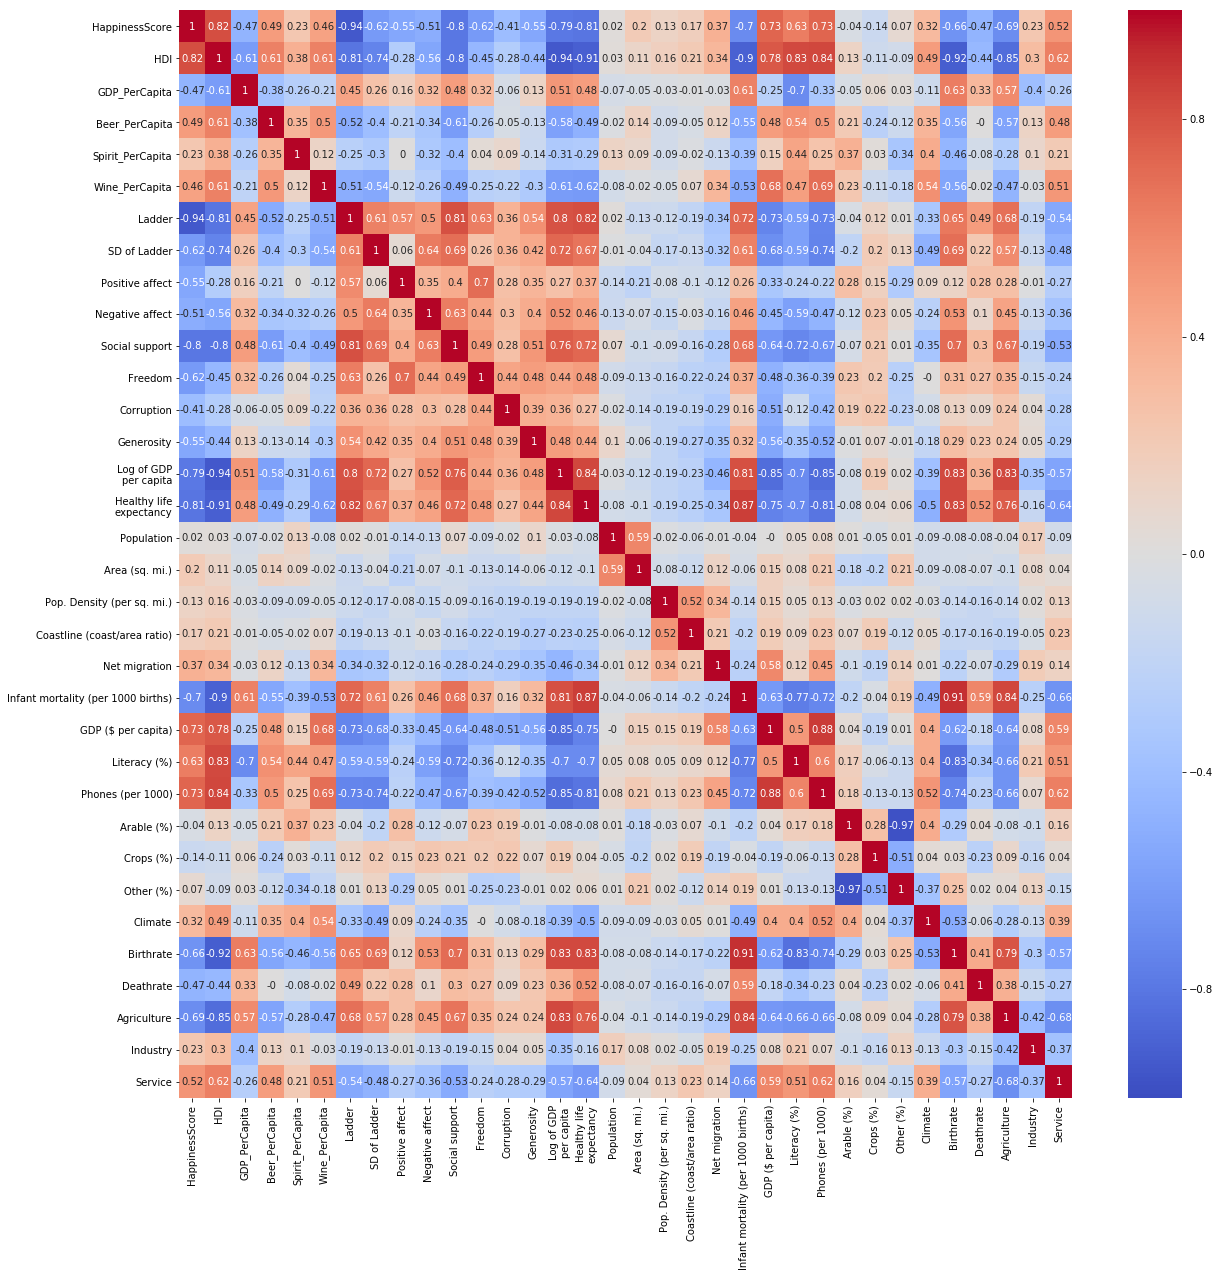

In [76]:
#Overall Correlation Matrix- between all variables
#heat map with values

corr=df_merged.corr()
corr=corr.round(decimals=2)
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);
plt.show()

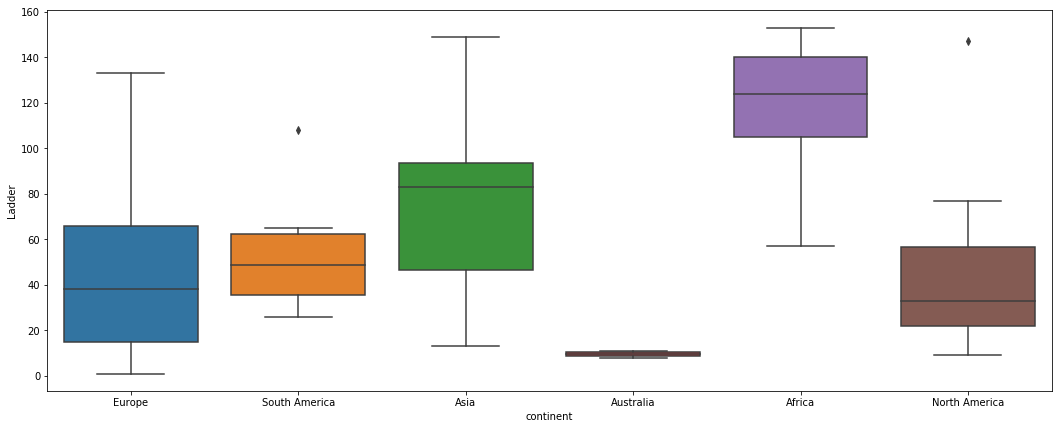

In [77]:
#Overall boxplot between continent to ladder

plt.figure(figsize=(18,7))
sns.boxplot(x='continent',y='Ladder',data=df_merged)
plt.show()

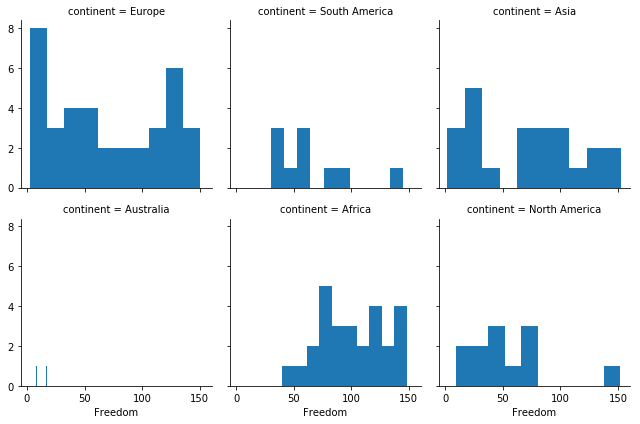

In [78]:
#Freedom ranking per continent using FacetGrid

g = sns.FacetGrid(data=df_merged,col='continent',col_wrap=3)
g = g.map(plt.hist, 'Freedom')

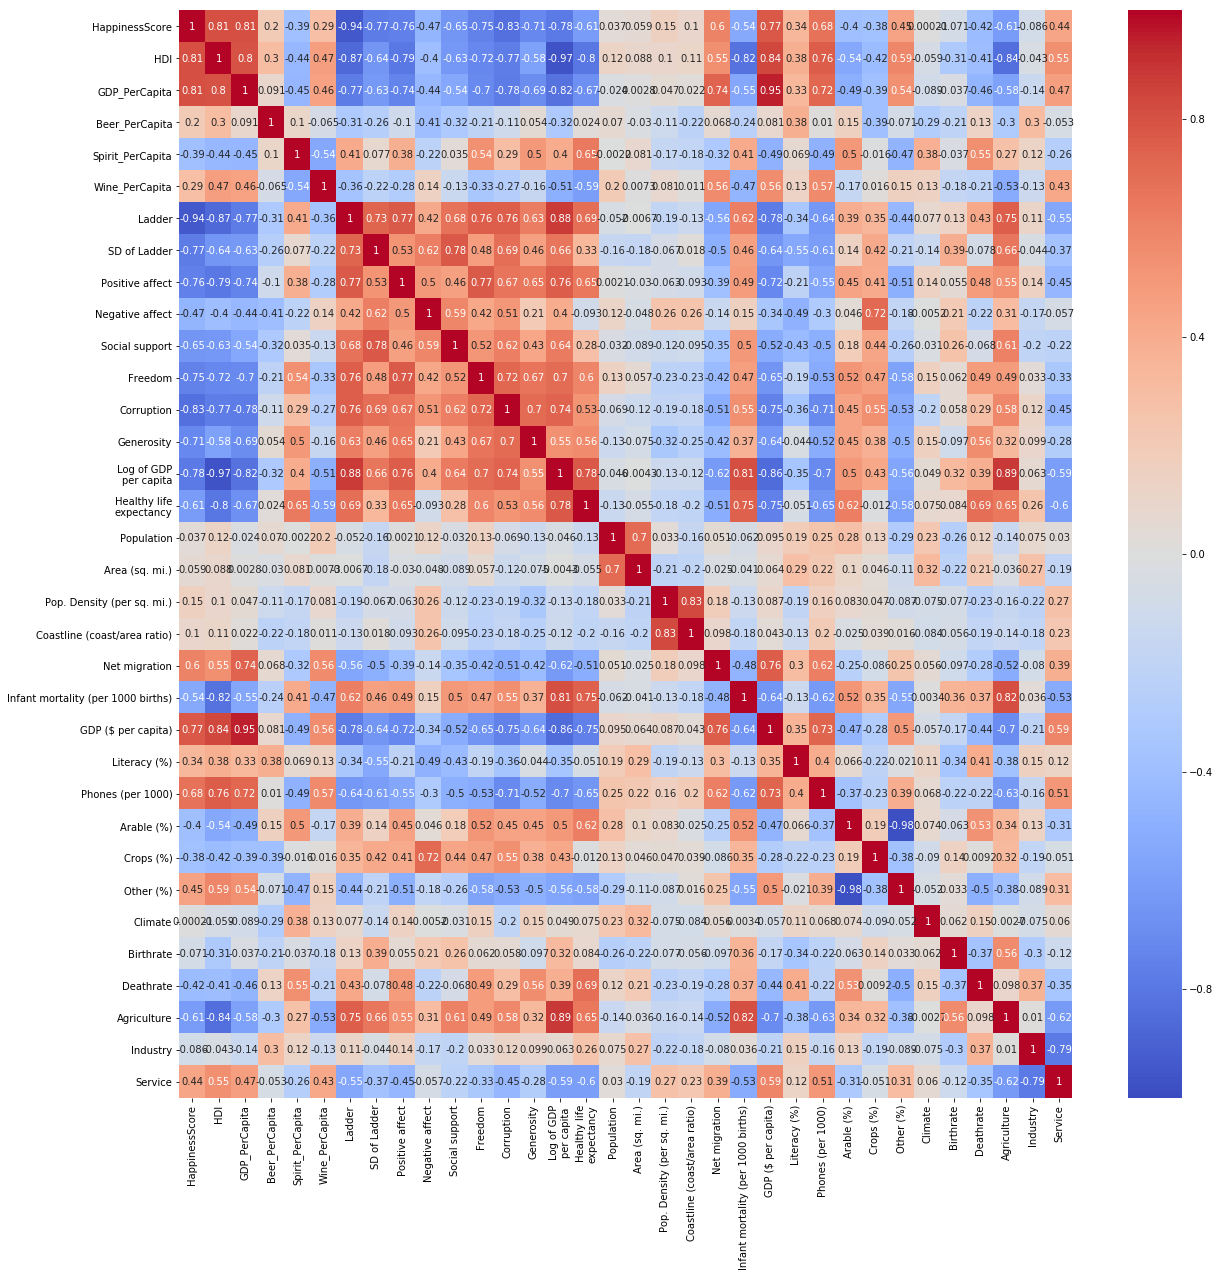

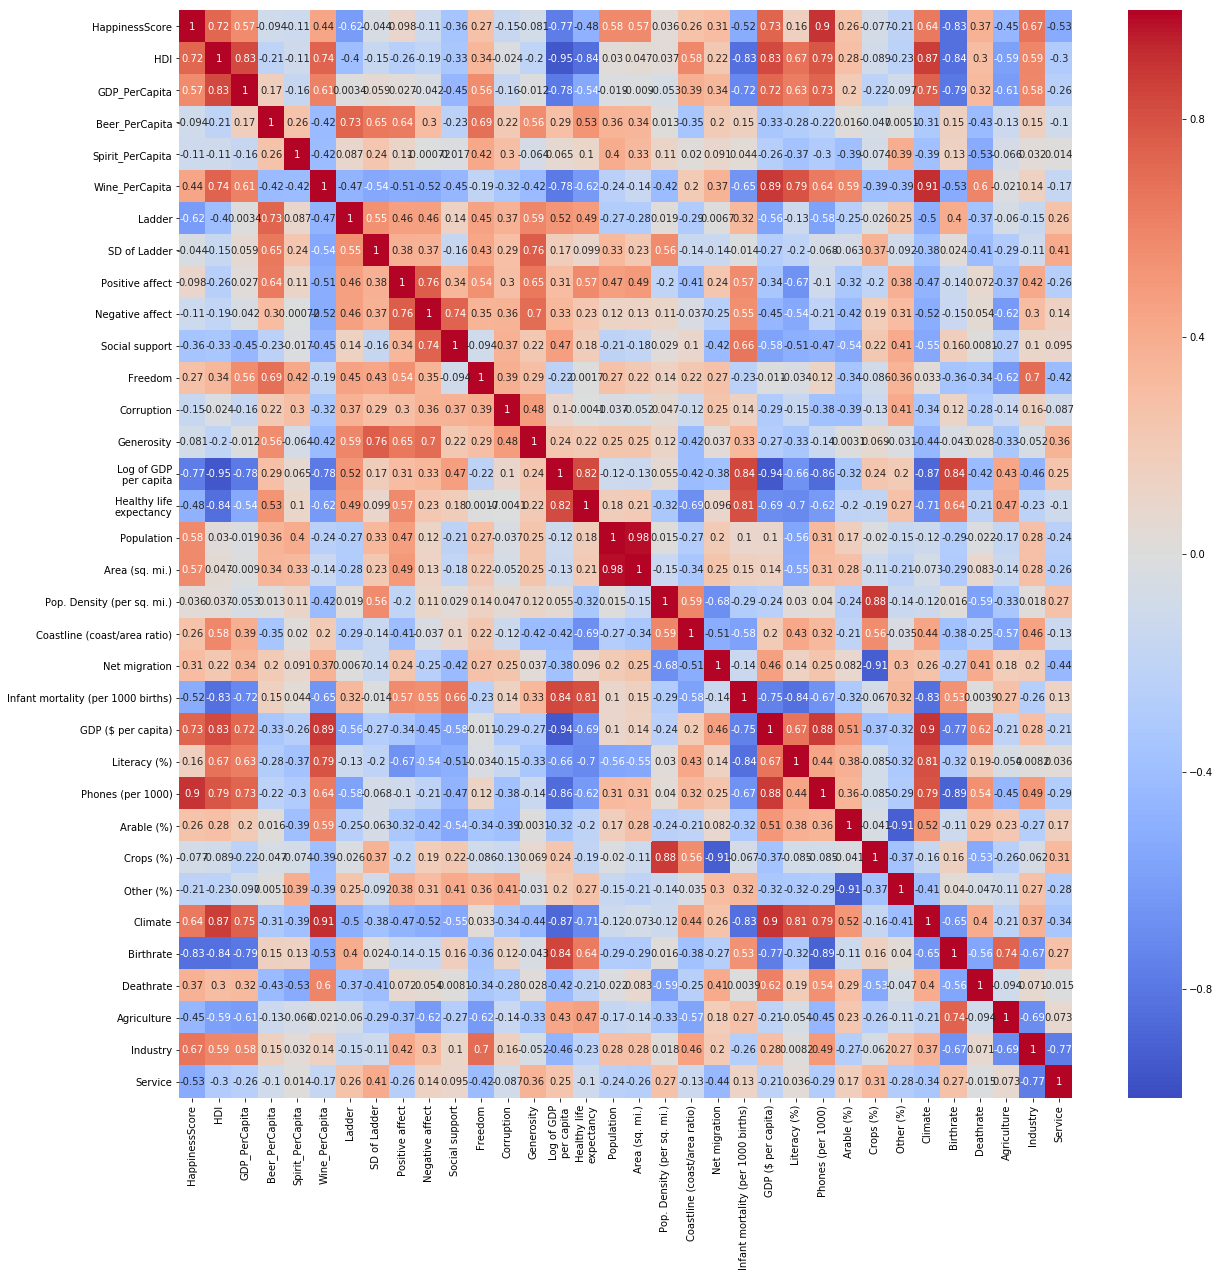

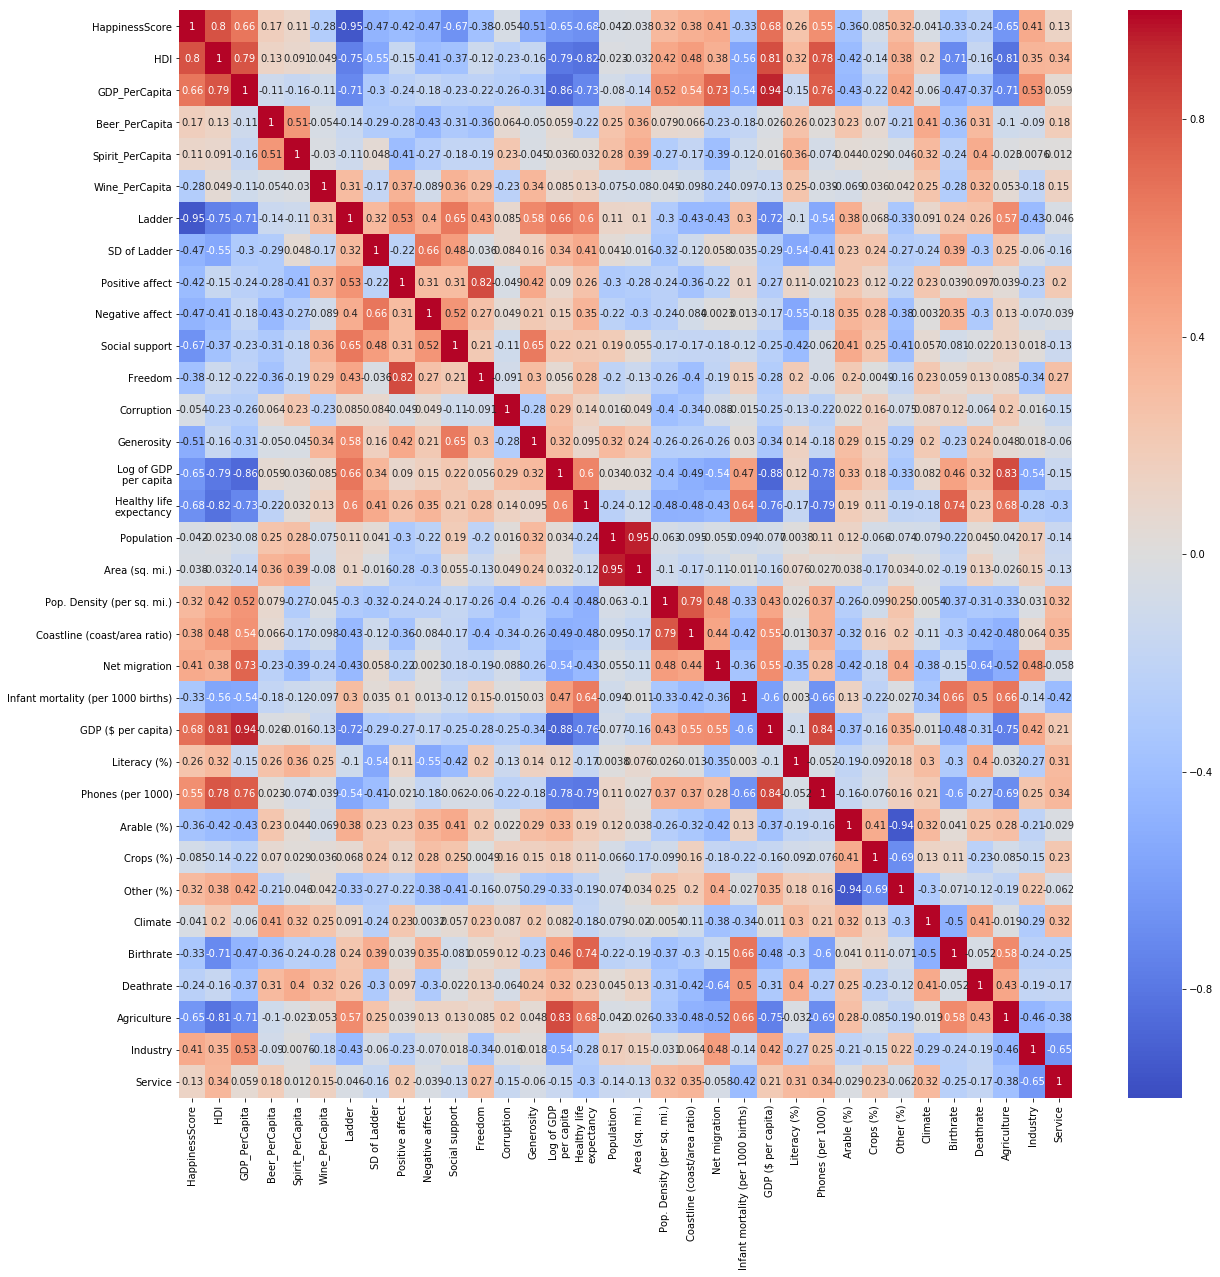

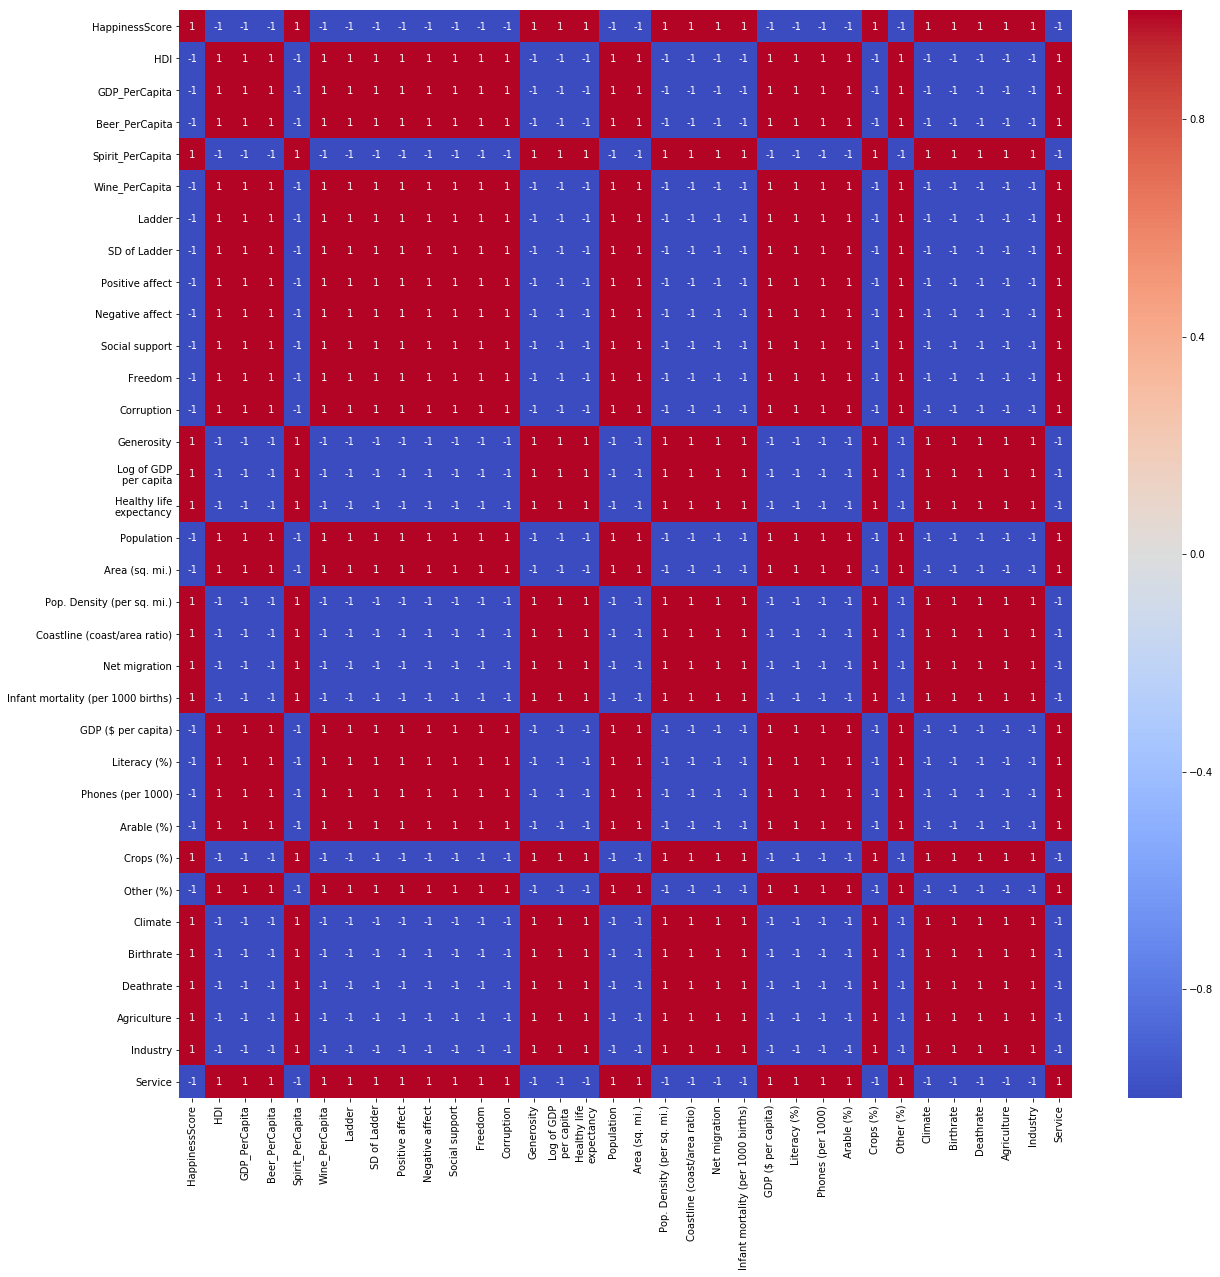

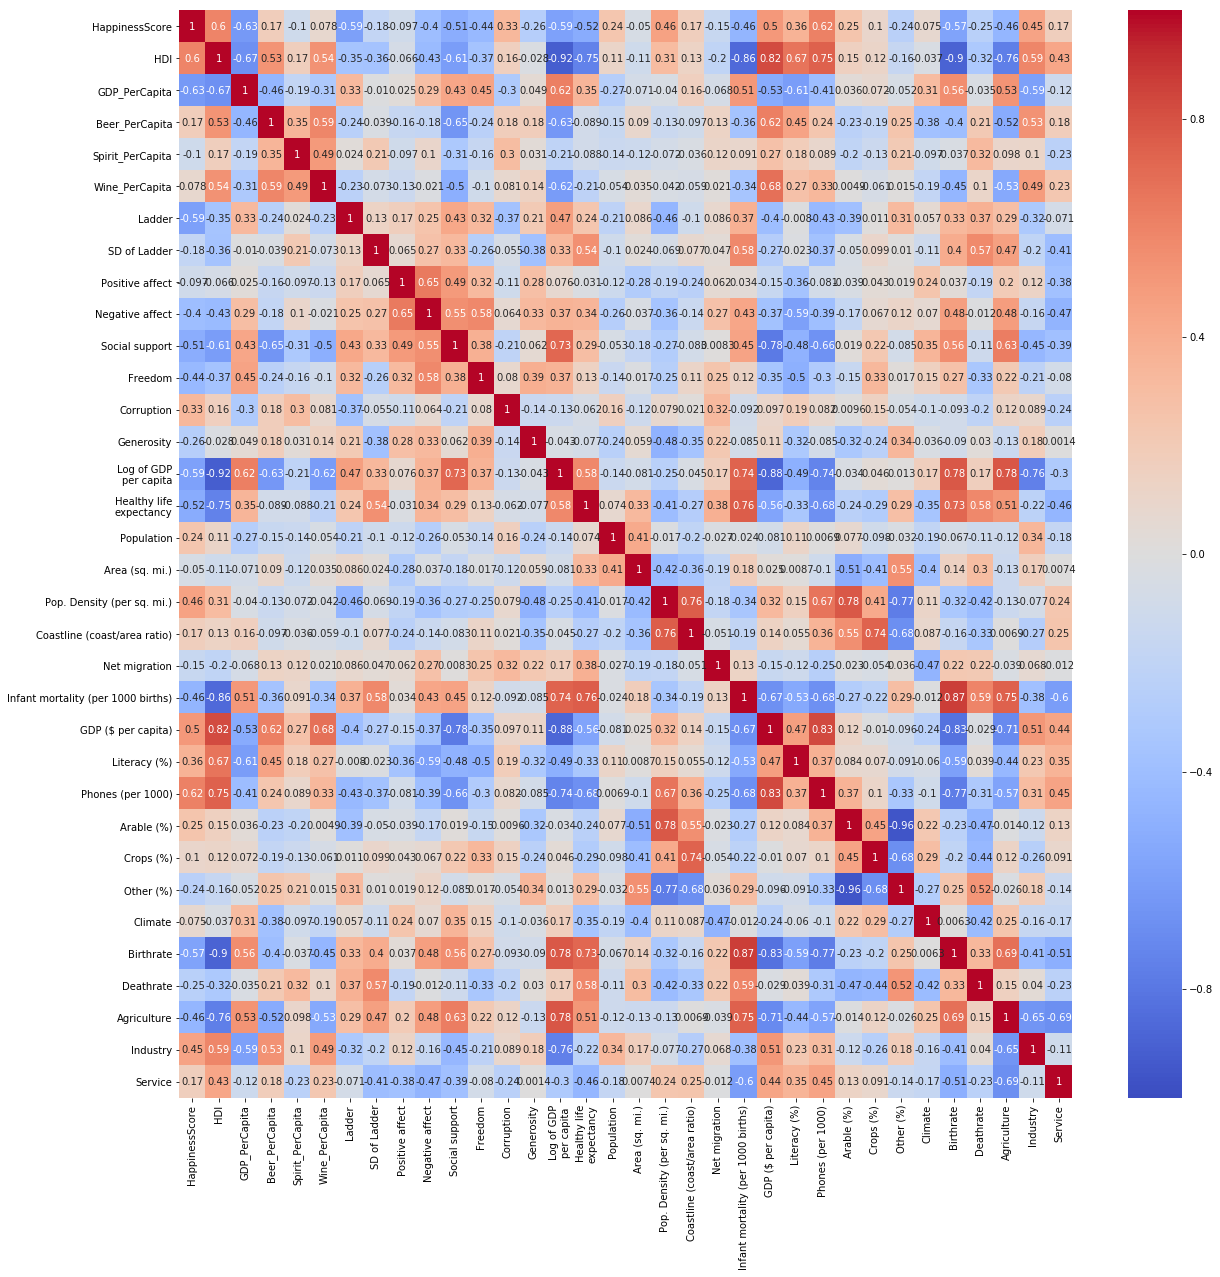

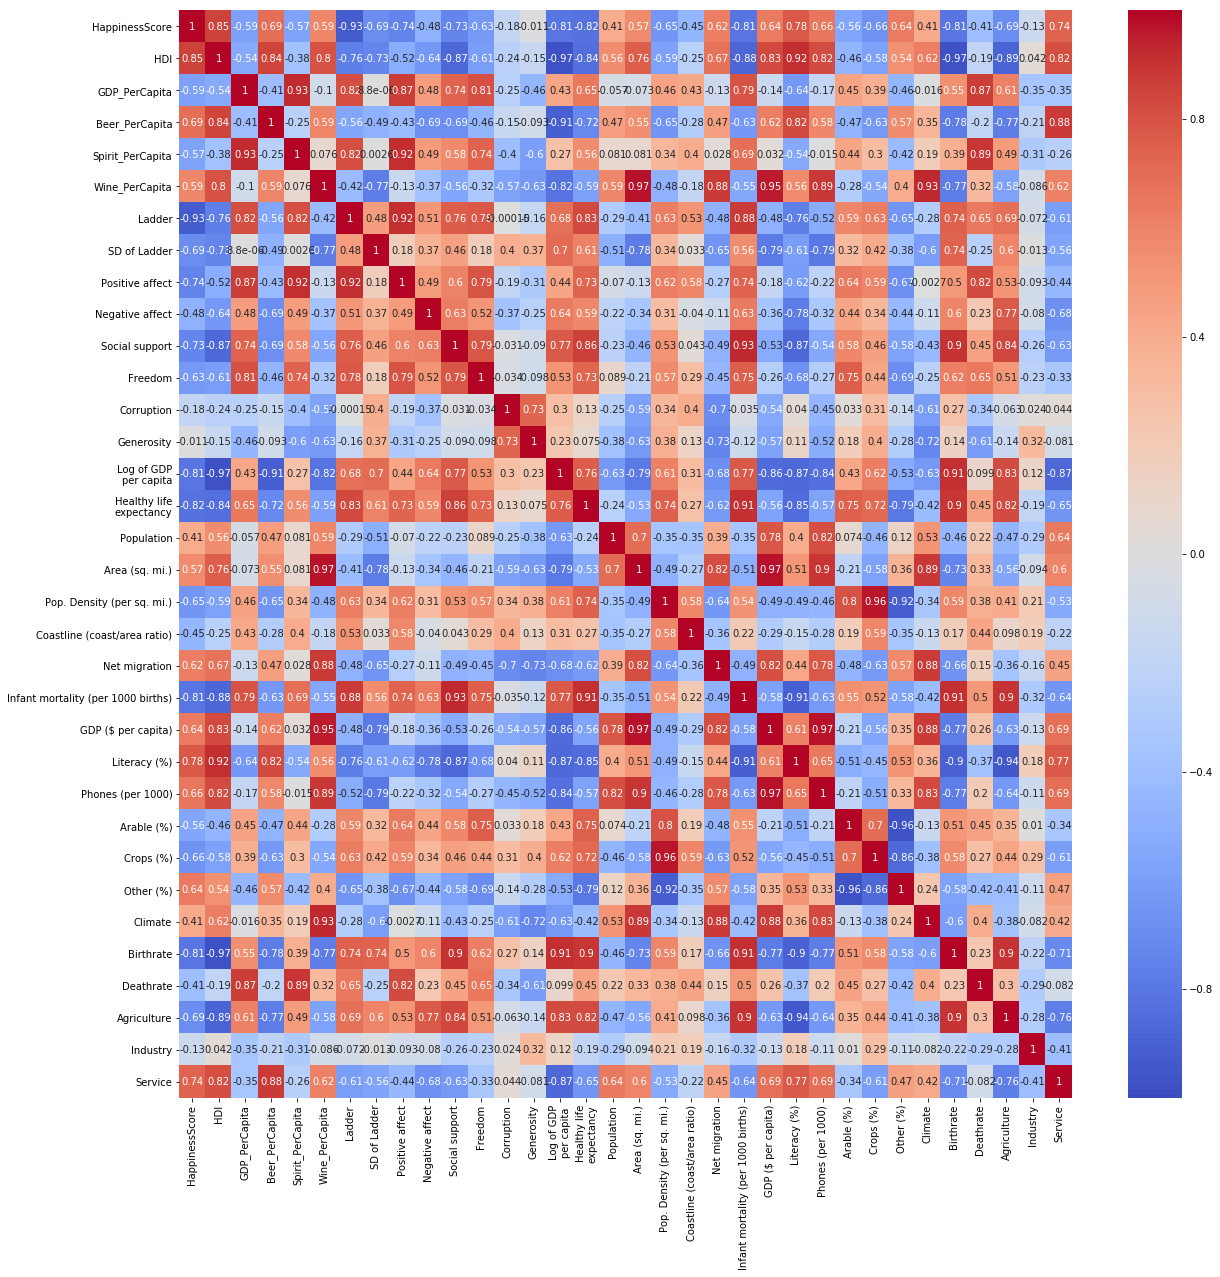

In [79]:
#Correlation matrix per each continent separate

for con in df_merged['continent'].unique():
    tempdf=df_merged[df_merged.continent==con]
    
    corr=tempdf.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,
                vmin=-1,
                vmax=1,
                cmap='coolwarm',
                annot=True);
    plt.show()

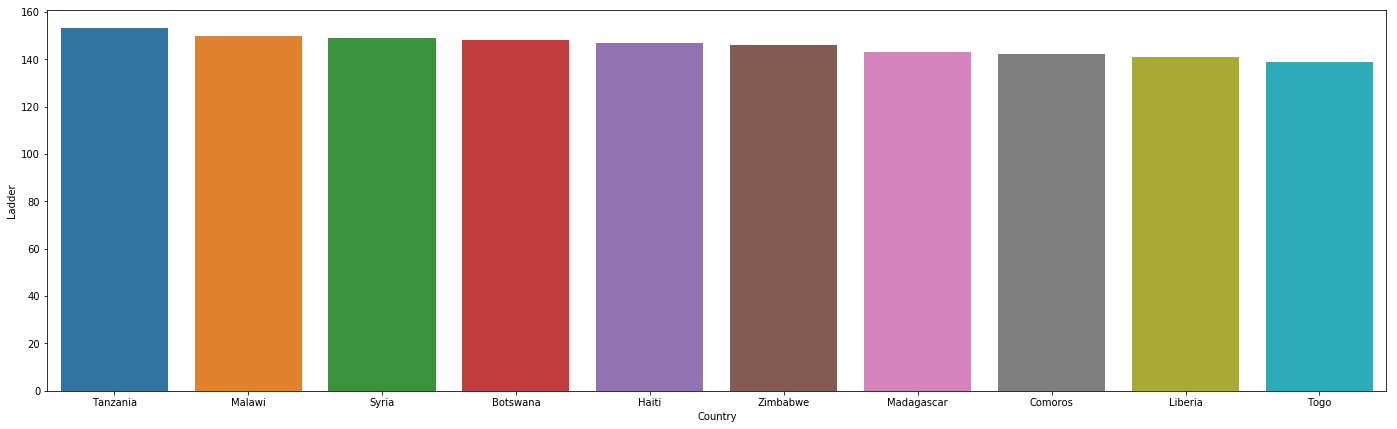

In [80]:
#Top ten ranking countries  by ladder

plt.figure(figsize=(24,7))
sns.barplot(x='Country',y='Ladder',data=df_merged,order=df_merged.loc[df_merged.Ladder.argsort()[::-1][0:10],'Country'])                                                             
plt.show()

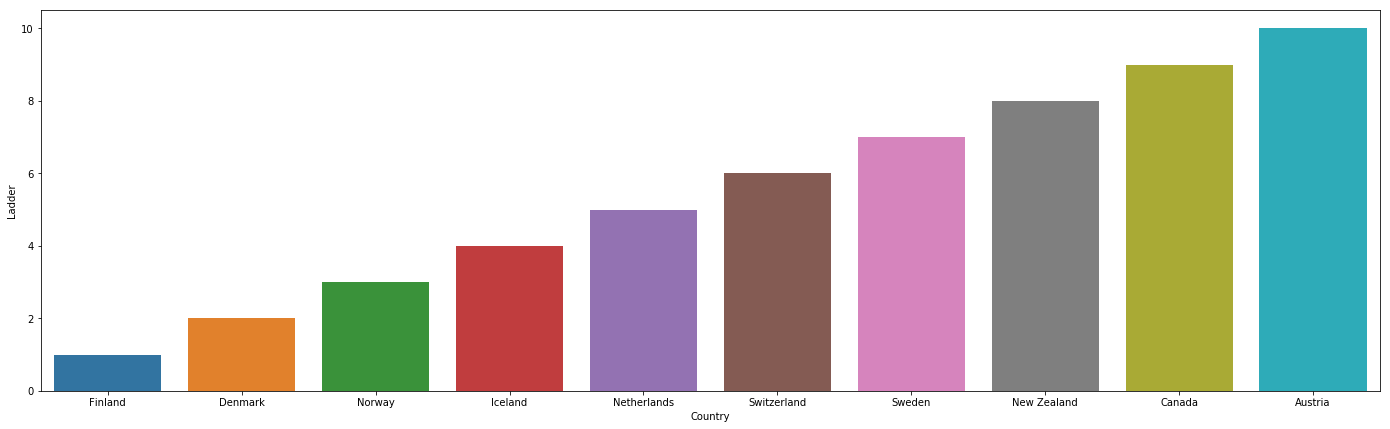

In [81]:
#Top minimum ranking countries by ladder

plt.figure(figsize=(24,7))
sns.barplot(x='Country',y='Ladder',data=df_merged,order=df_merged.loc[df_merged.Ladder.argsort()[0:10],'Country'])                                                             
plt.show()

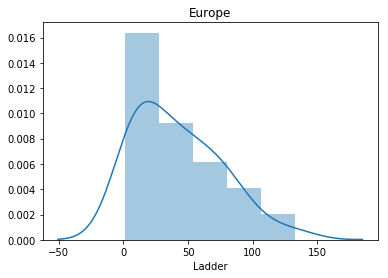

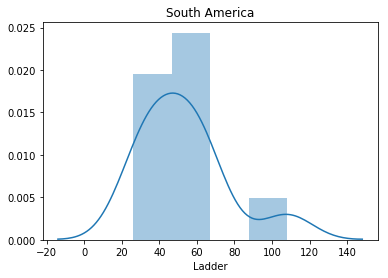

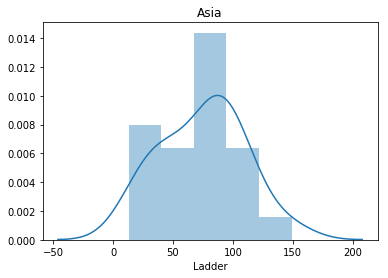

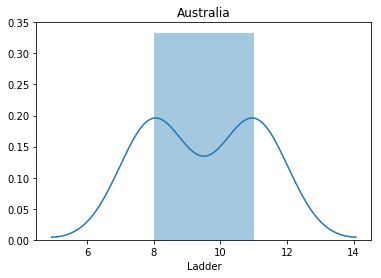

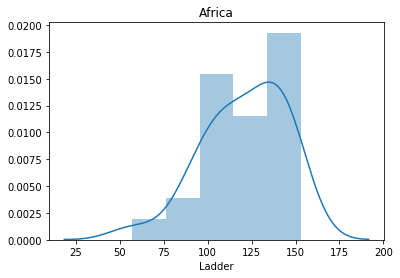

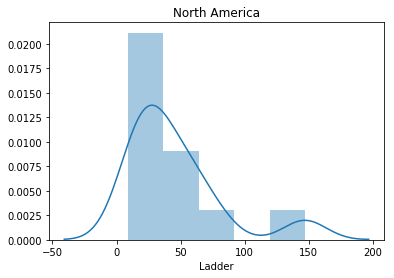

In [82]:
# ladder distribution for each continent using distplot

for con in df_merged['continent'].unique():
    tempdf=df_merged[df_merged.continent==con]
    
    plt.title(con)
    sns.distplot(tempdf.Ladder)
    plt.show()

In [83]:
#Map viz for alcohol consumption for all countries

df_x=pd.read_csv('C:/Users/Olga Kriyokov/Desktop/Dataset+Final/country_code.csv').loc[:,['Country_name','code_3digit']].rename(columns={'Country_name':'Country'})
tempdf=pd.merge(df_x,df_merged,on='Country')

#Plotting
fig = px.choropleth(tempdf, locations="code_3digit",
                    color="Beer_PerCapita",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.show()

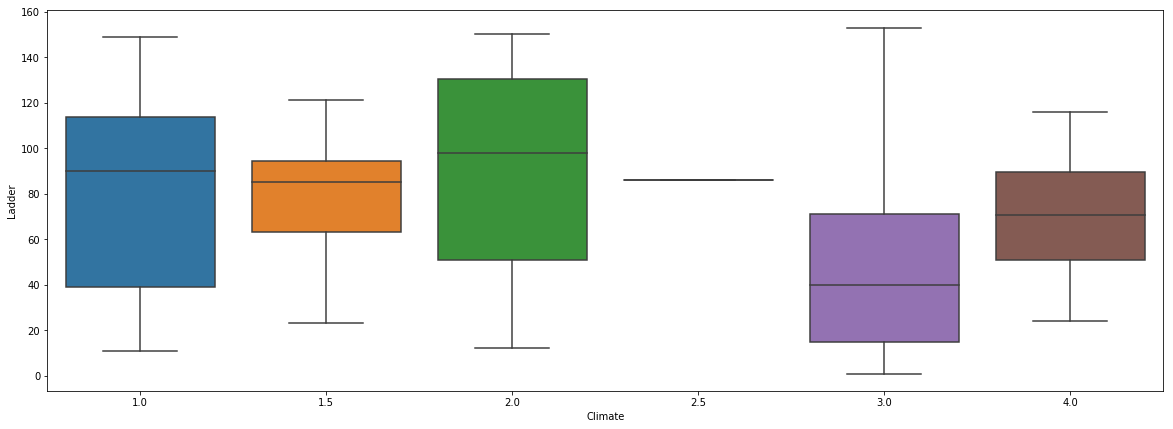

In [84]:
#Ladder vs Climate
plt.figure(figsize=(20,7))
sns.boxplot(y='Ladder',x='Climate',data=df_merged)
plt.show()

In [85]:
#Scatter plot of parameters having high correlation

#Top corelation
corr=df_merged.corr()
topcorr=[]
for i in corr.columns:
    for j in corr.index:
        if((i!=j) and (corr.loc[i,j]>0.8)):
            topcorr.append((i,j))
            print(i,j)

HappinessScore HDI
HDI HappinessScore
HDI Literacy (%)
HDI Phones (per 1000)
Ladder Social support
Ladder Healthy life
expectancy
Social support Ladder
Log of GDP
per capita Healthy life
expectancy
Log of GDP
per capita Infant mortality (per 1000 births)
Log of GDP
per capita Birthrate
Log of GDP
per capita Agriculture
Healthy life
expectancy Ladder
Healthy life
expectancy Log of GDP
per capita
Healthy life
expectancy Infant mortality (per 1000 births)
Healthy life
expectancy Birthrate
Infant mortality (per 1000 births) Log of GDP
per capita
Infant mortality (per 1000 births) Healthy life
expectancy
Infant mortality (per 1000 births) Birthrate
Infant mortality (per 1000 births) Agriculture
GDP ($ per capita) Phones (per 1000)
Literacy (%) HDI
Phones (per 1000) HDI
Phones (per 1000) GDP ($ per capita)
Birthrate Log of GDP
per capita
Birthrate Healthy life
expectancy
Birthrate Infant mortality (per 1000 births)
Agriculture Log of GDP
per capita
Agriculture Infant mortality (per 1000 birt

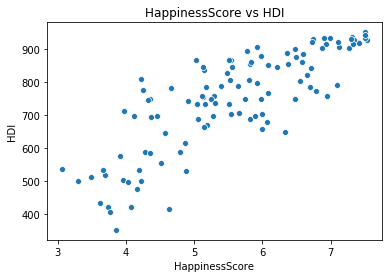

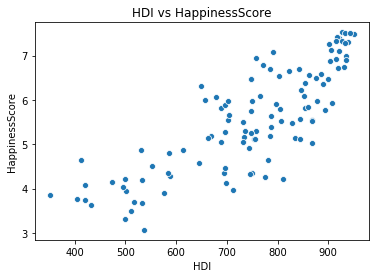

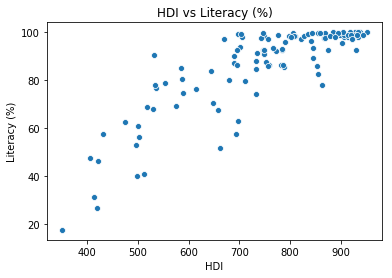

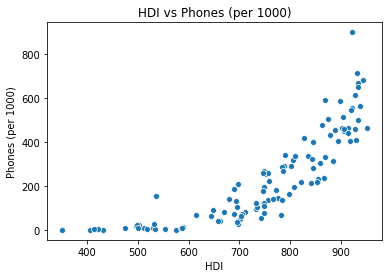

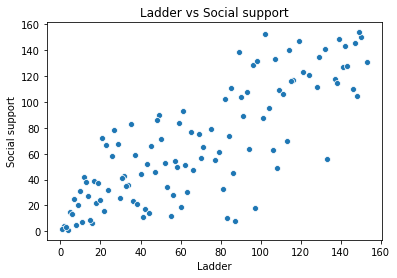

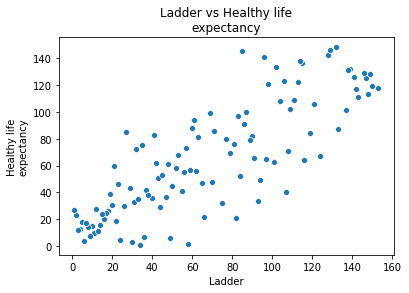

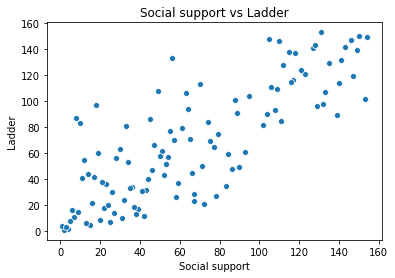

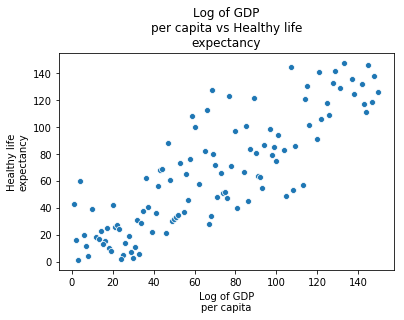

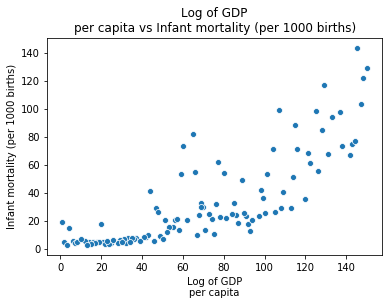

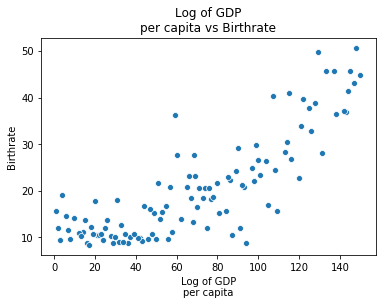

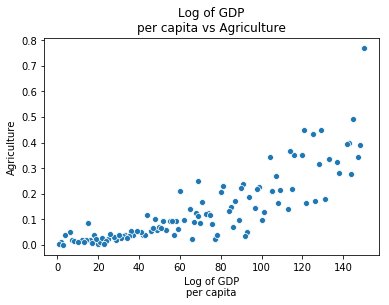

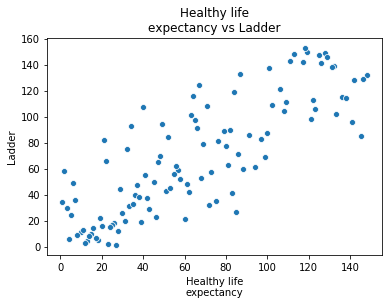

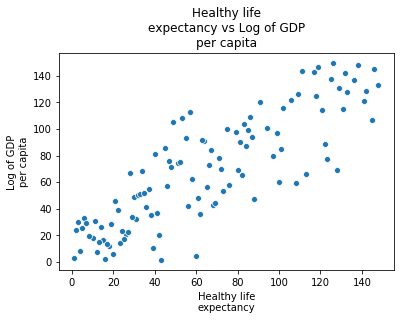

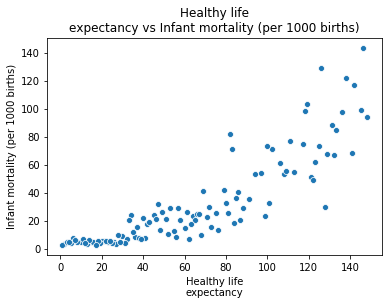

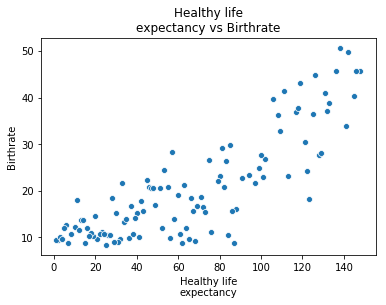

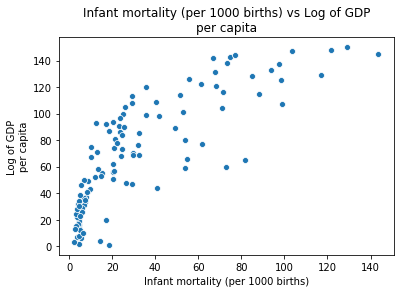

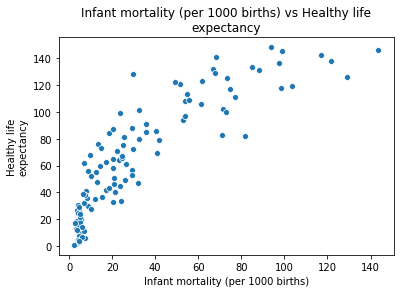

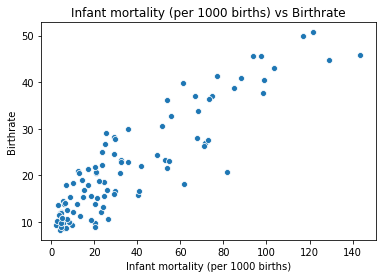

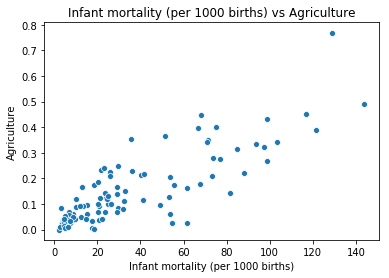

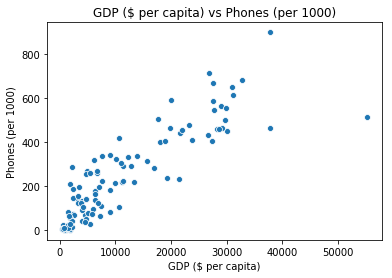

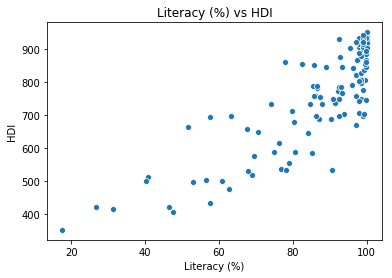

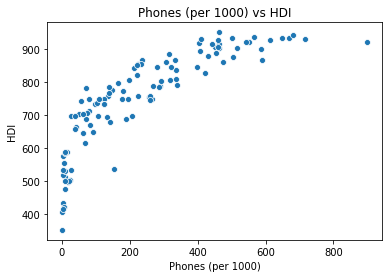

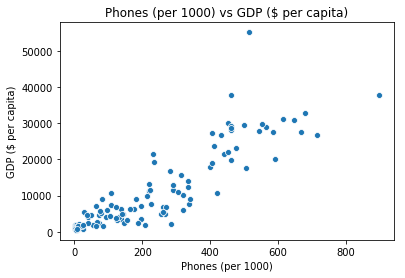

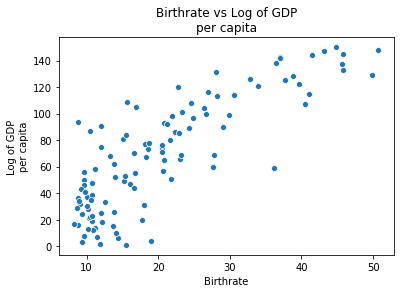

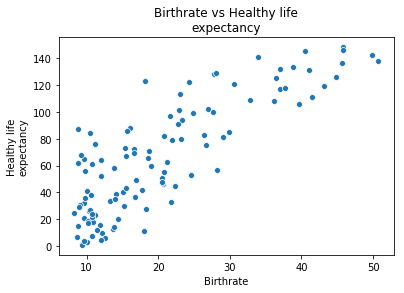

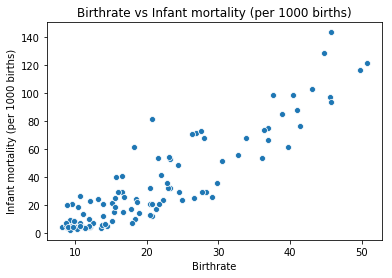

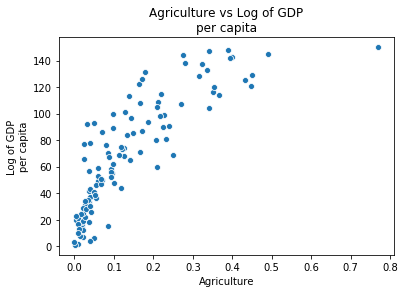

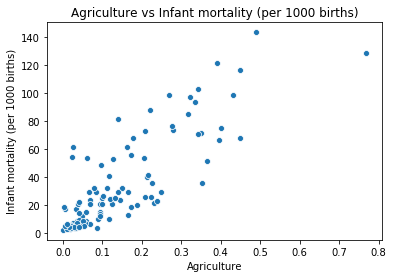

In [86]:
#Scatter plot for high correlations

for pair in topcorr:
    plt.title(pair[0]+" vs "+pair[1])
    sns.scatterplot(x=pair[0],y=pair[1],data=df_merged)
    plt.show()

In [87]:
#K Means Clustering

#Preparating data
temp_country=df_merged['Country']
del df_merged['Country']
m=df_merged.dtypes
c=df_merged.loc[:,m[m=='O'].index].columns
x=pd.get_dummies(df_merged,columns=c)

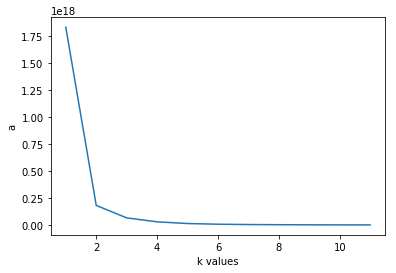

In [88]:
#K Means Clustering

#Finding n_clusters value

from sklearn.cluster import KMeans

a = []
for k in range (1,12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    a.append(kmeans.inertia_)

plt.plot(range(1,12),a)
plt.xlabel('k values')
plt.ylabel('a')
plt.show()

In [89]:
#Now CLustering
kmeans = KMeans(n_clusters= 3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
#Data and CLusters
clusters_knn = kmeans.fit_predict(x)
tempdf=df_merged.copy()
tempdf['Country']=temp_country
tempdf['ClusterNo']=clusters_knn
display(tempdf)

Region_x Hemisphere  HappinessScore  HDI  \
0         Central and Eastern Europe      north           4.655  782   
1        Latin America and Caribbean      south           6.650  822   
2         Central and Eastern Europe      north           4.360  749   
3          Australia and New Zealand      south           7.313  938   
4                     Western Europe      north           7.119  906   
5         Central and Eastern Europe      north           5.291  757   
6    Middle East and Northern Africa      north           6.218  846   
7         Central and Eastern Europe      north           5.802  805   
8                     Western Europe      north           6.929  915   
9                 Sub-Saharan Africa      north           3.484  512   
10       Latin America and Caribbean      south           5.822  689   
11                Sub-Saharan Africa      south           3.974  712   
12       Latin America and Caribbean       both           6.952  758   
13        Central and Eastern Europe      north           4.217  810   
14                Sub-Saharan Africa      north           3.739  420   
15                 Southeastern Asia      north           3.907  576   
16                Sub-Saharan Africa      south           4.513  553   
17                     North America      north           7.404  922   
18                Sub-Saharan Africa      north           3.763  405   
19       Latin America and Caribbean      south           6.705  842   
20                      Eastern Asia       noth           5.245  748   
21       Latin America and Caribbean       both           6.481  747   
22                Sub-Saharan Africa      south           3.956  502   
23       Latin America and Caribbean      north           7.087  791   
24        Central and Eastern Europe      north           5.488  828   
25                    Western Europe      north           5.546  867   
26        Central and Eastern Europe      north           6.596  885   
27                    Western Europe      north           7.526  928   
28       Latin America and Caribbean      north           5.155  733   
29       Latin America and Caribbean       both           5.976  749   
..                               ...        ...             ...  ...   
81                    Western Europe      north           5.123  845   
82   Middle East and Northern Africa      north           6.375  855   
83        Central and Eastern Europe      north           5.528  807   
84                Sub-Saharan Africa      north           4.219  499   
85        Central and Eastern Europe      north           5.177  785   
86                Sub-Saharan Africa      north           4.635  413   
87                 Southeastern Asia      north           6.739  930   
88        Central and Eastern Europe      north           6.078  853   
89        Central and Eastern Europe      north           5.768  894   
90                Sub-Saharan Africa      south           4.459  696   
91                    Western Europe      north           6.361  889   
92                    Western Europe      north           7.291  932   
93                    Western Europe      north           7.509  943   
94   Middle East and Northern Africa      north           3.069  536   
95                Sub-Saharan Africa      south           3.666  533   
96                 Southeastern Asia      north           6.474  748   
97                Sub-Saharan Africa      north           3.303  500   
98   Middle East and Northern Africa      north           5.045  732   
99   Middle East and Northern Africa      north           5.389  787   
100       Central and Eastern Europe      north           5.658  705   
101       Central and Eastern Europe      north           4.324  746   
102  Middle East and Northern Africa      north           6.573  862   
103                   Western Europe      north           6.725  920   
104                    North America      north           7.104  922

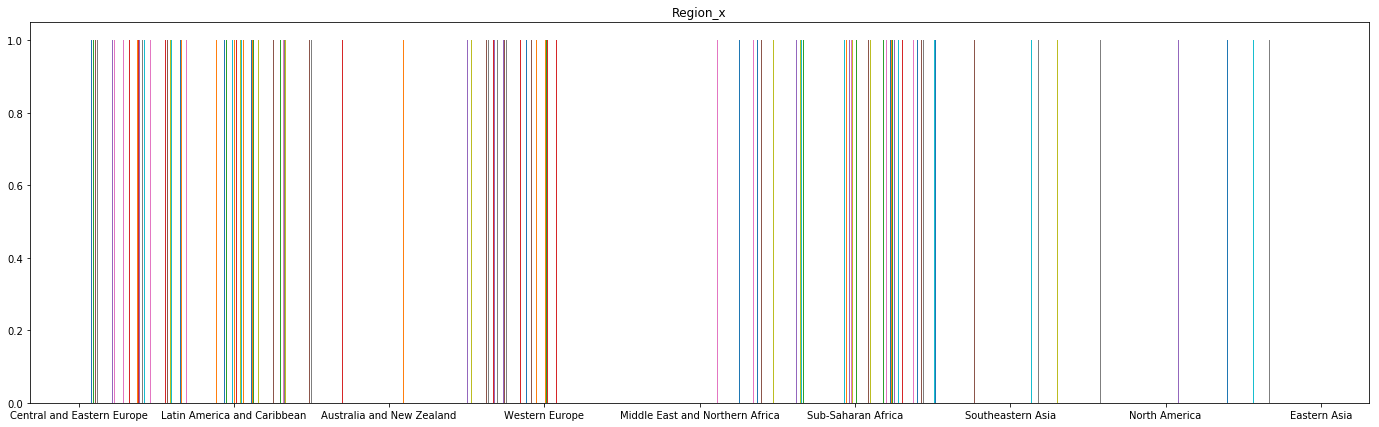

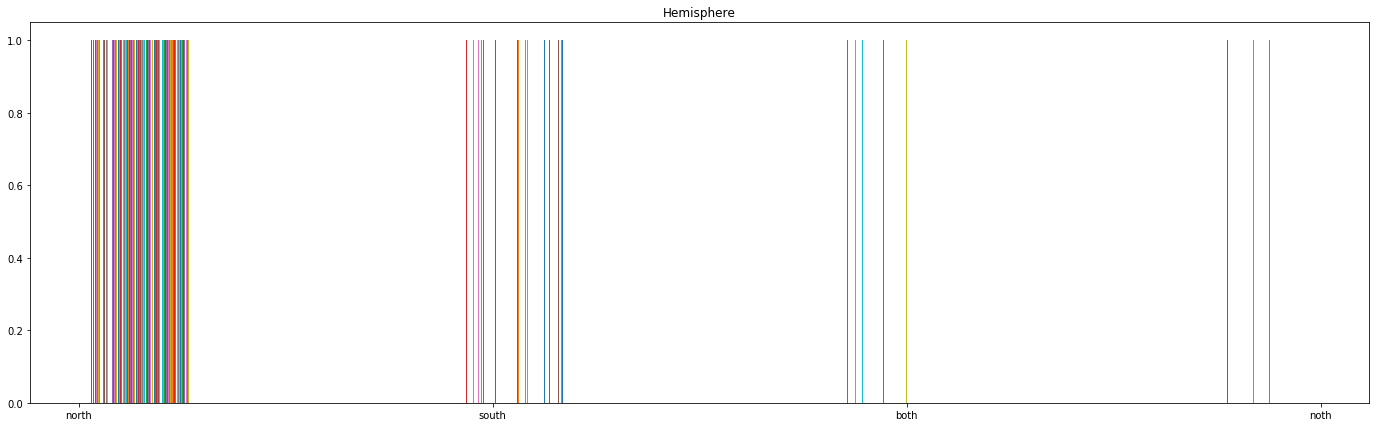

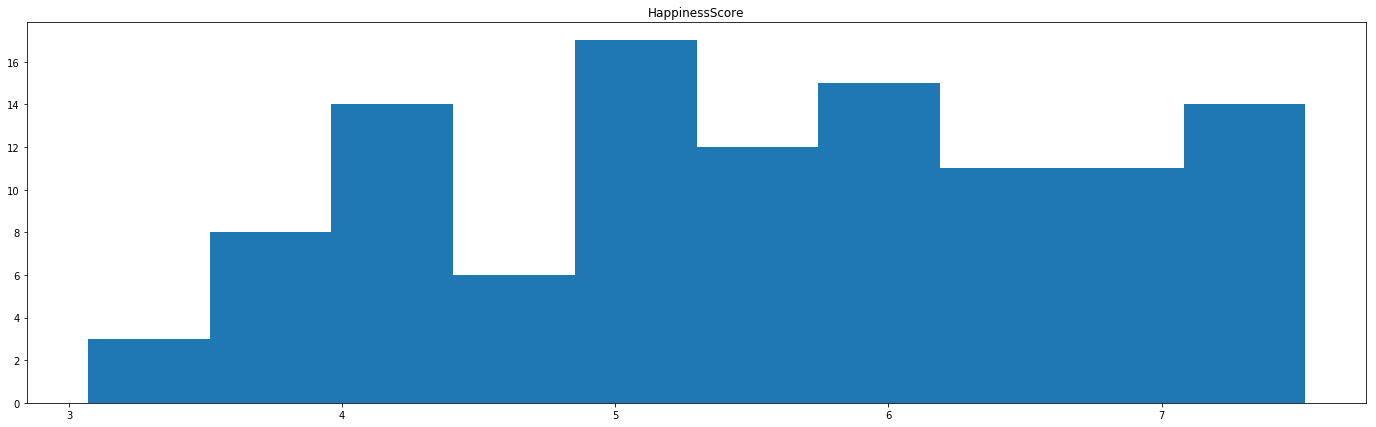

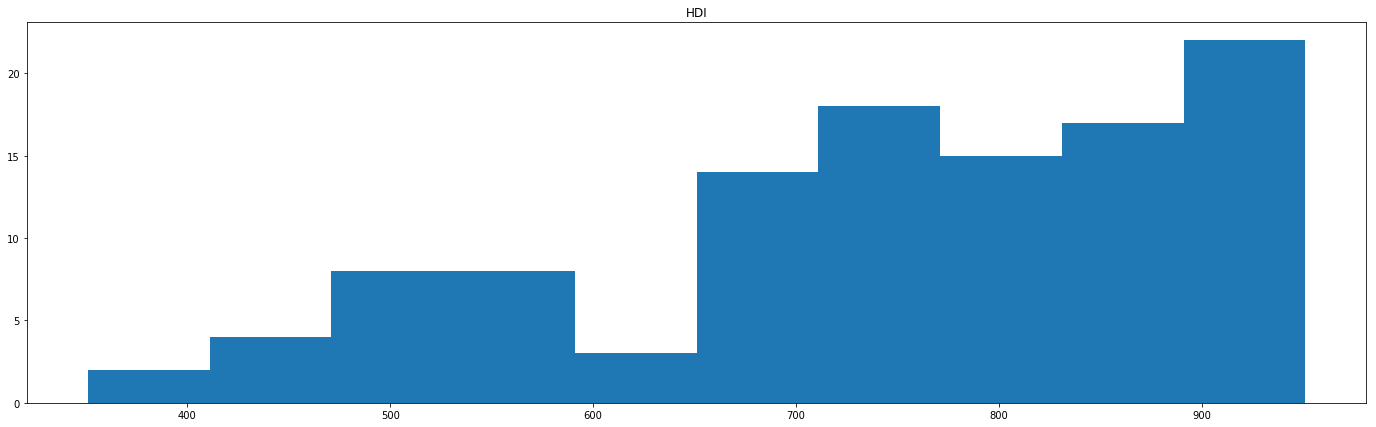

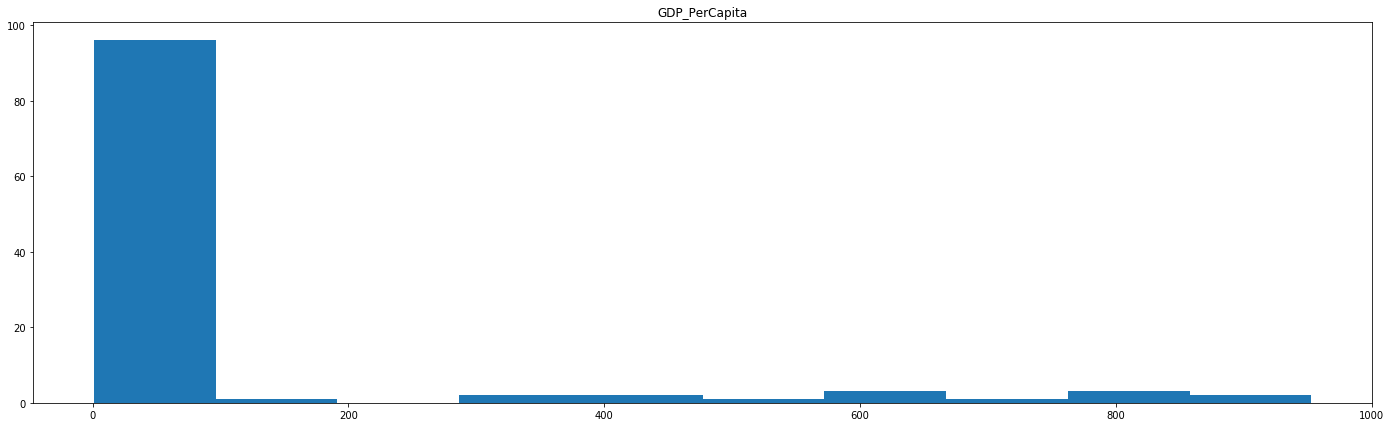

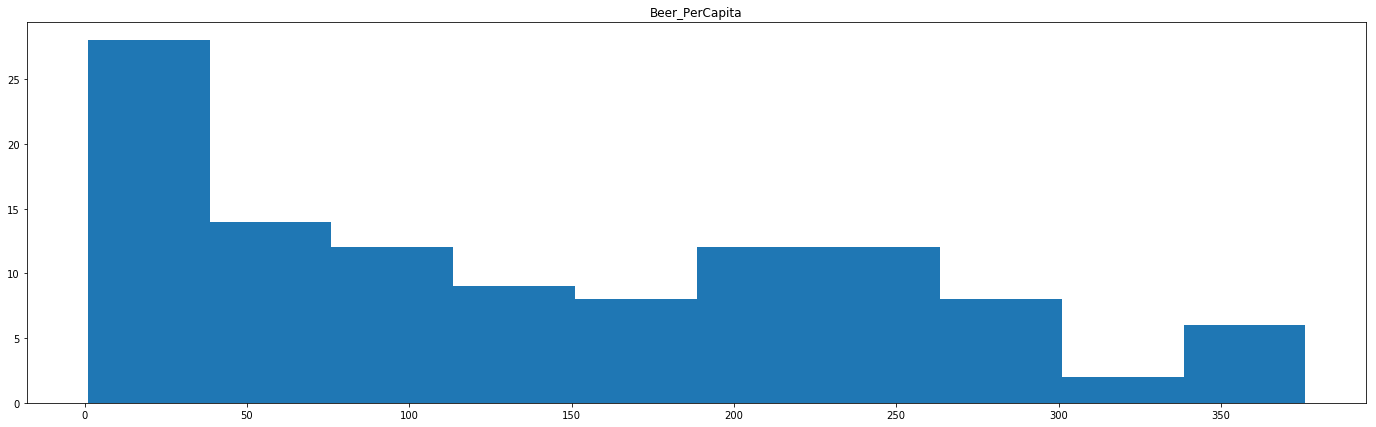

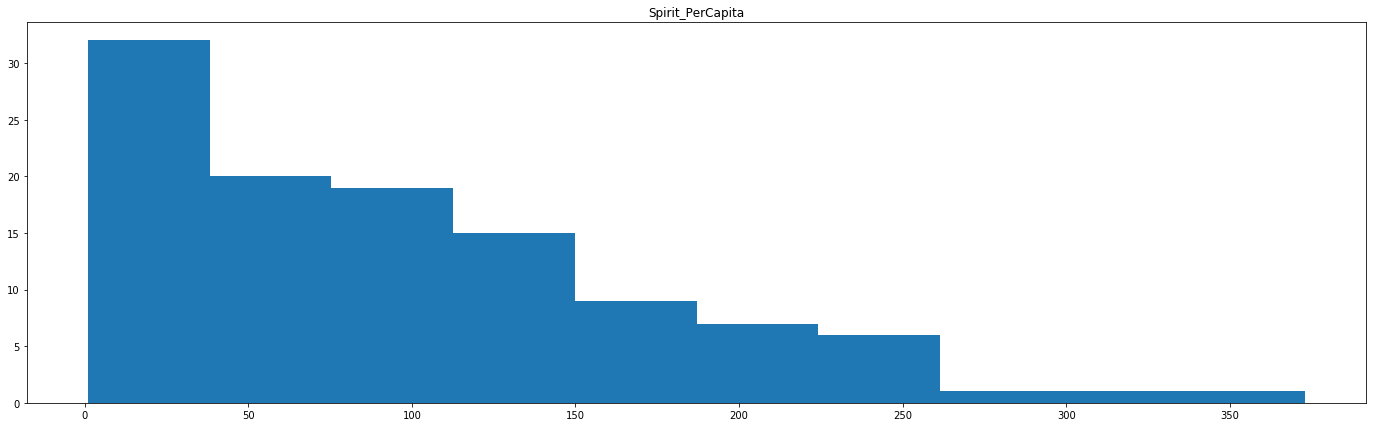

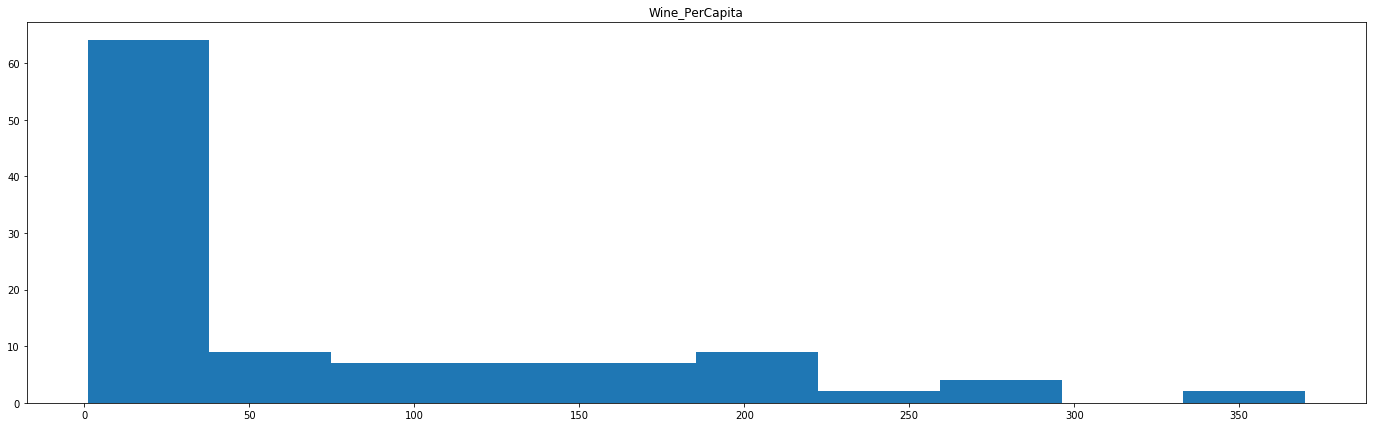

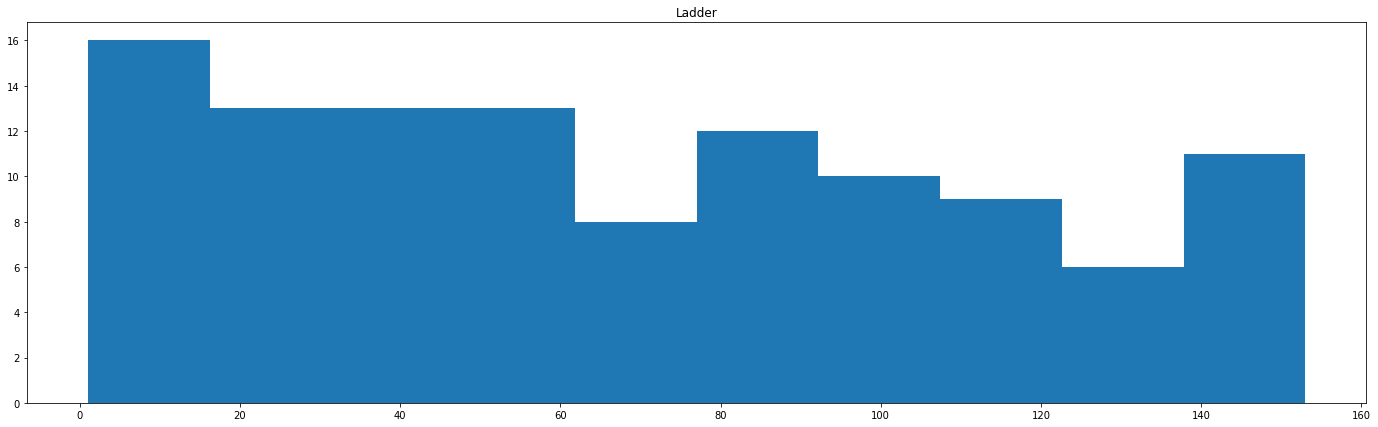

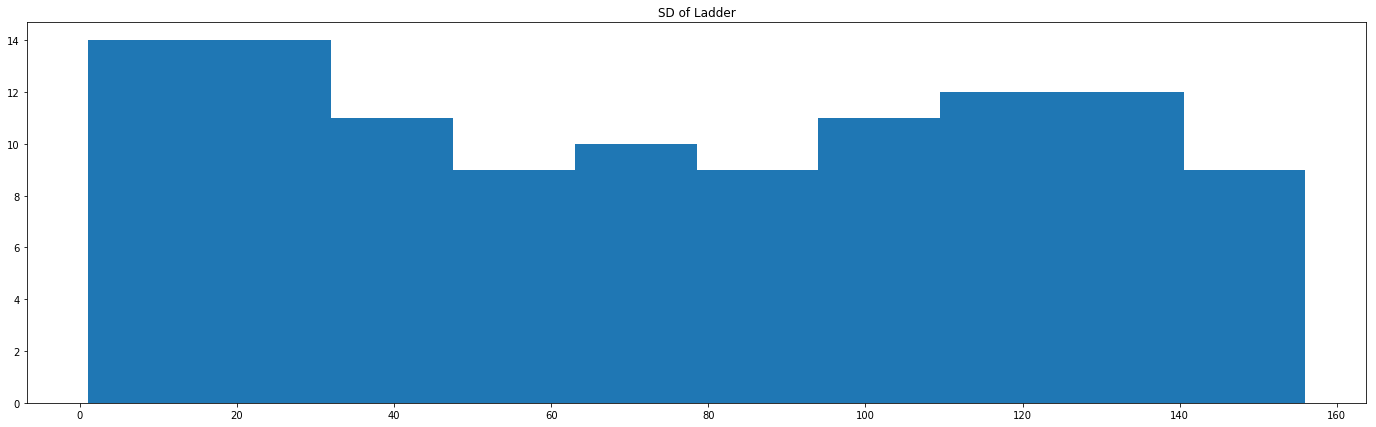

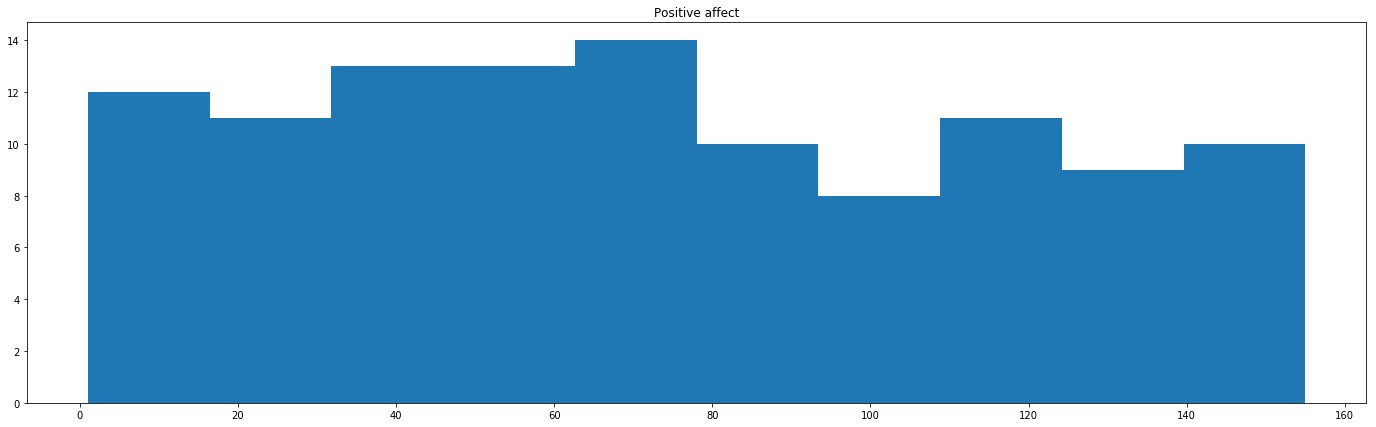

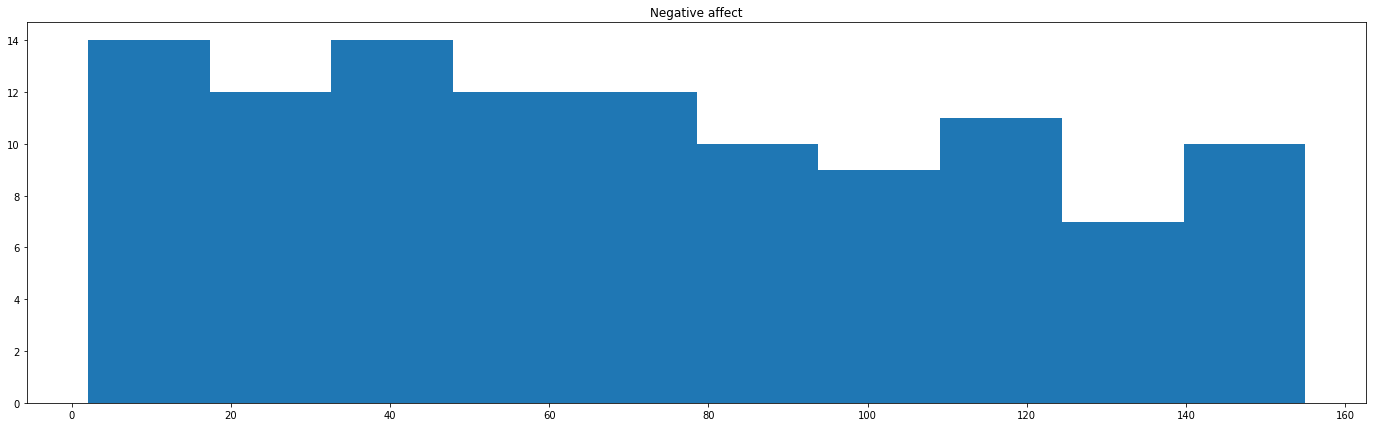

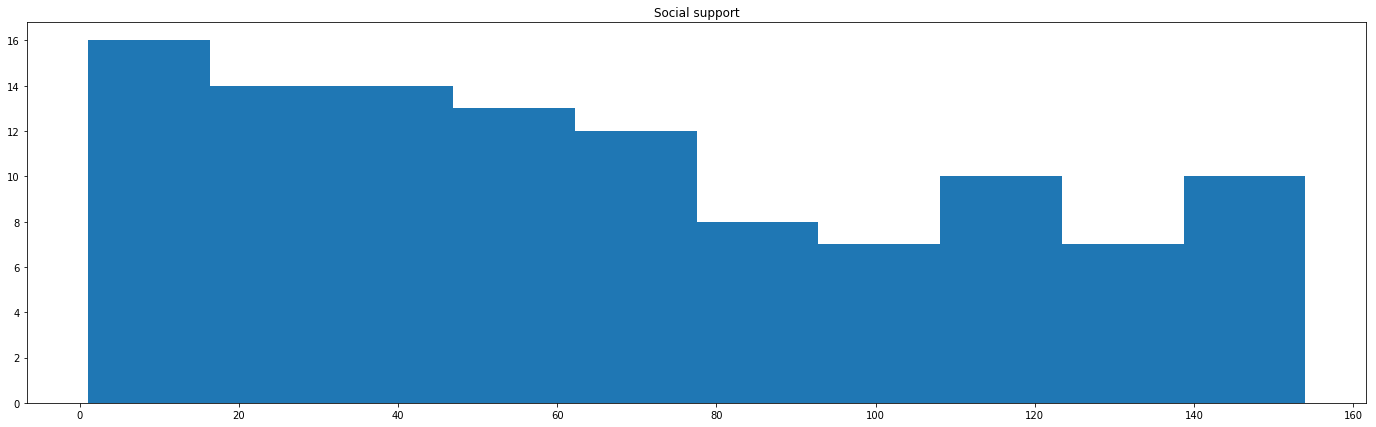

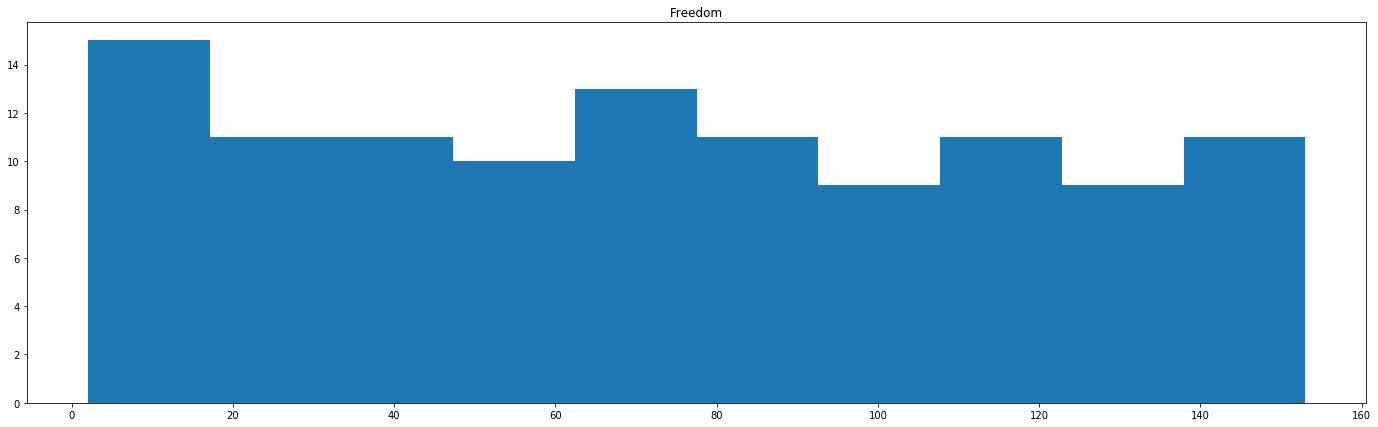

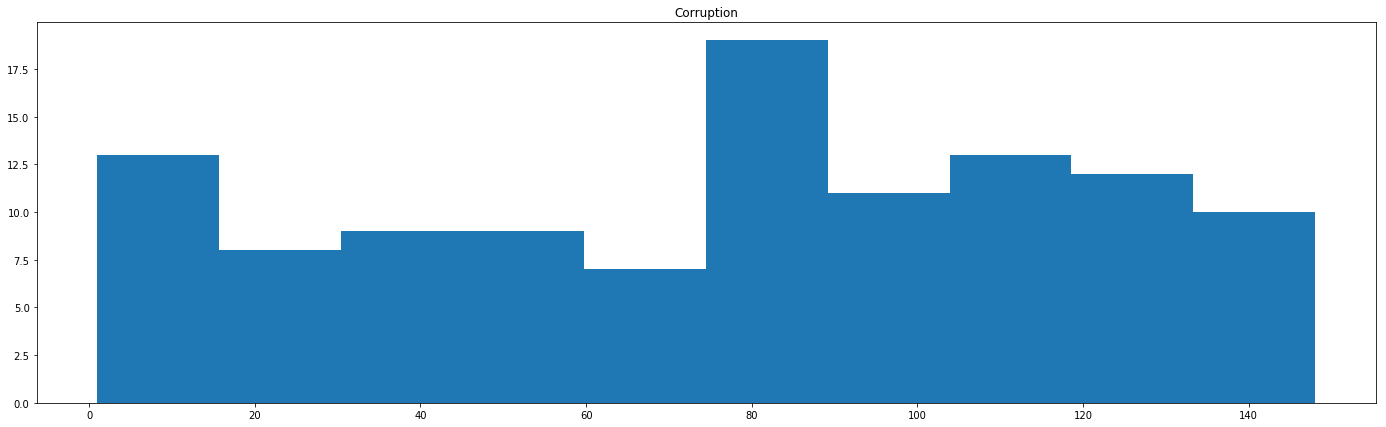

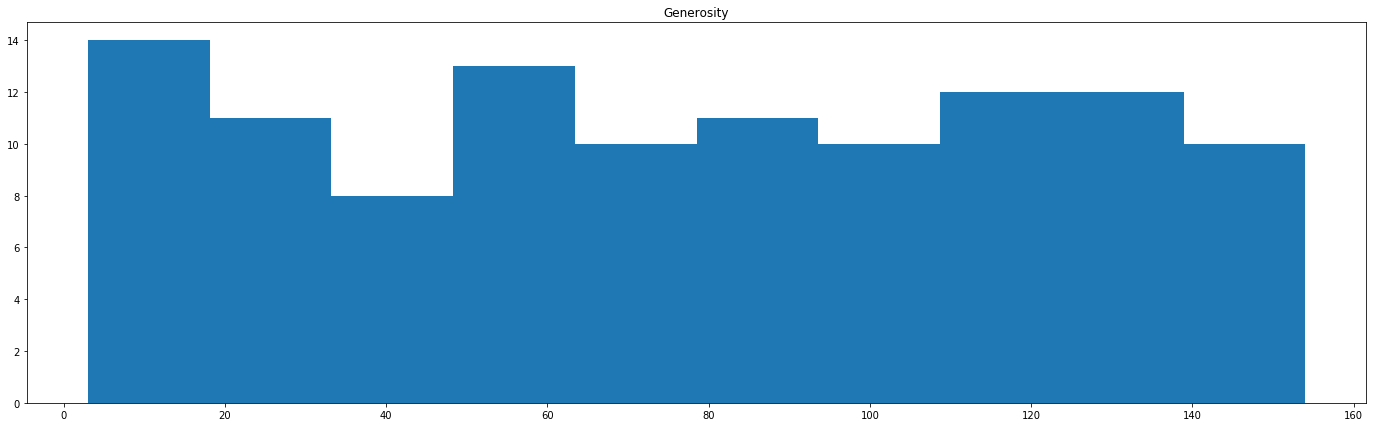

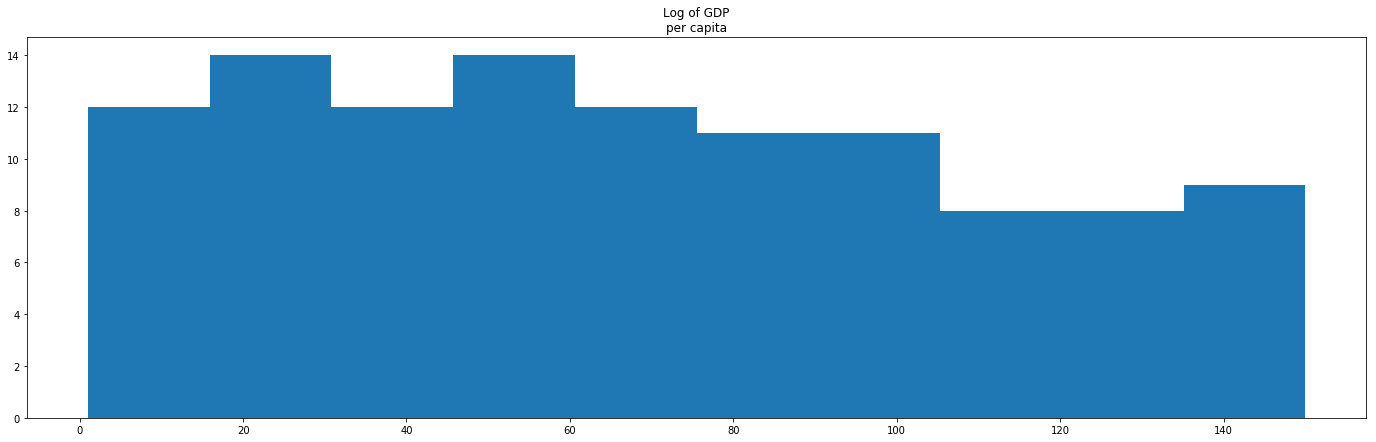

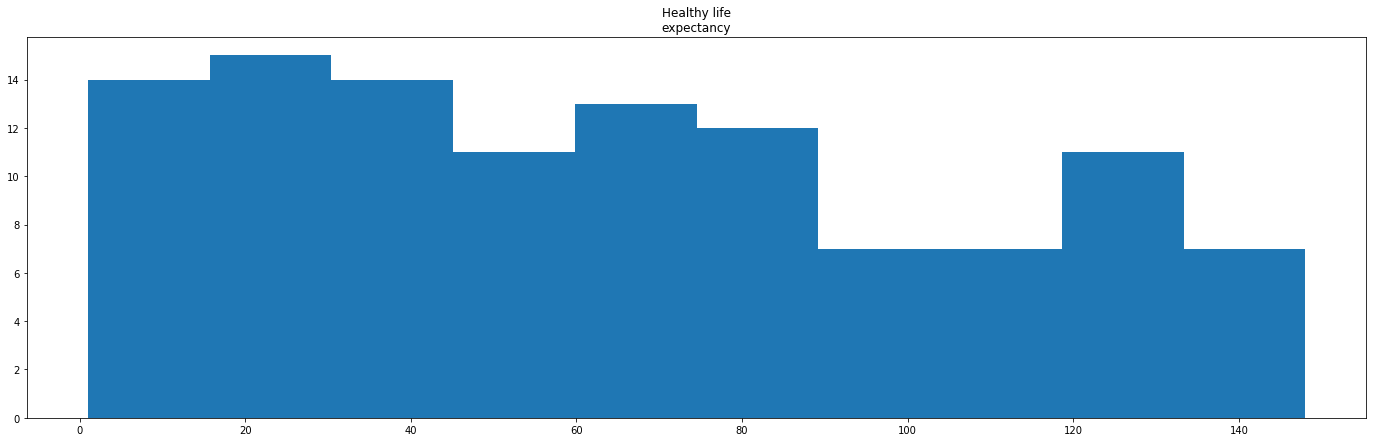

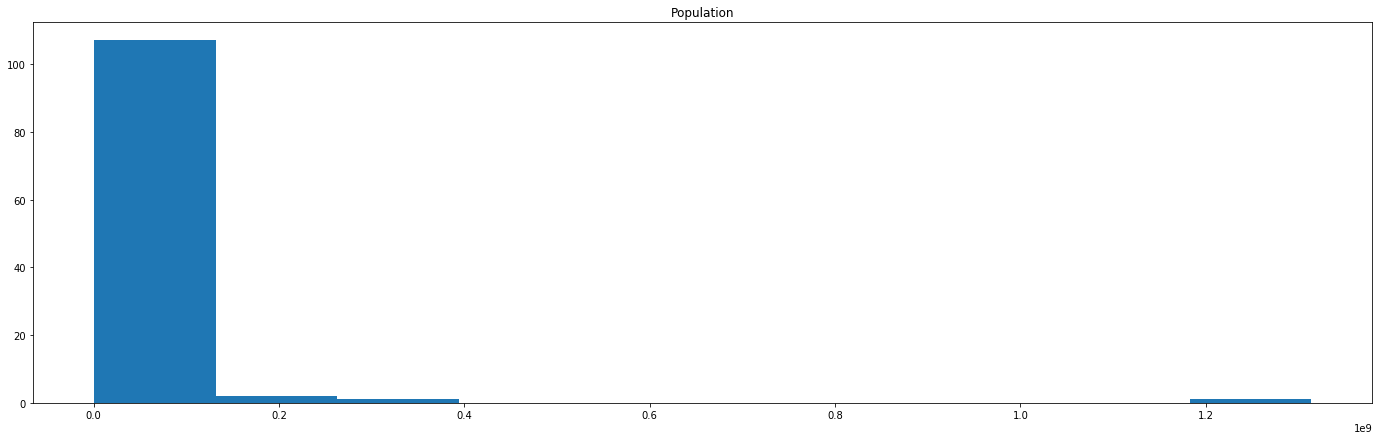

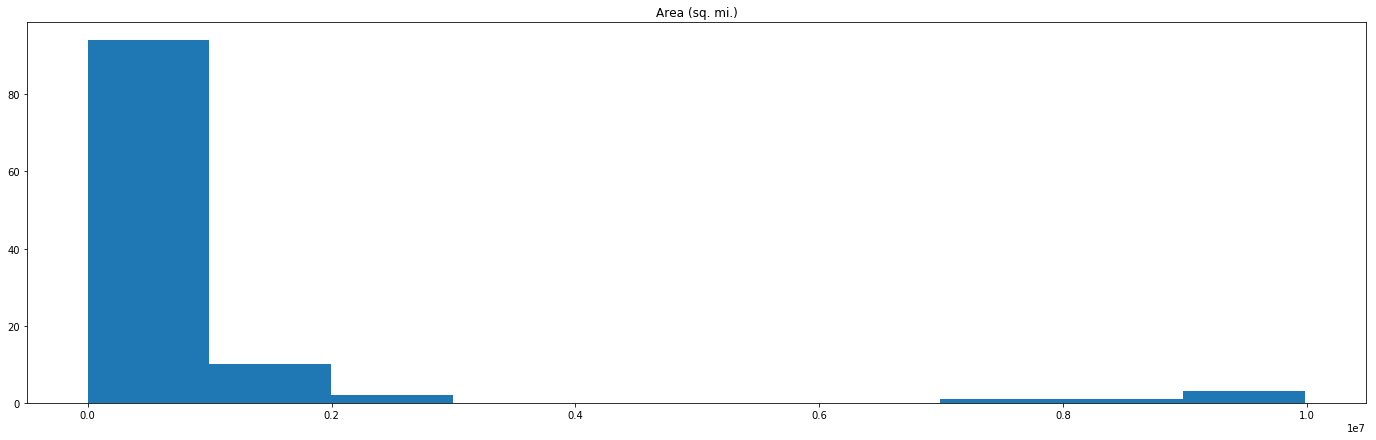

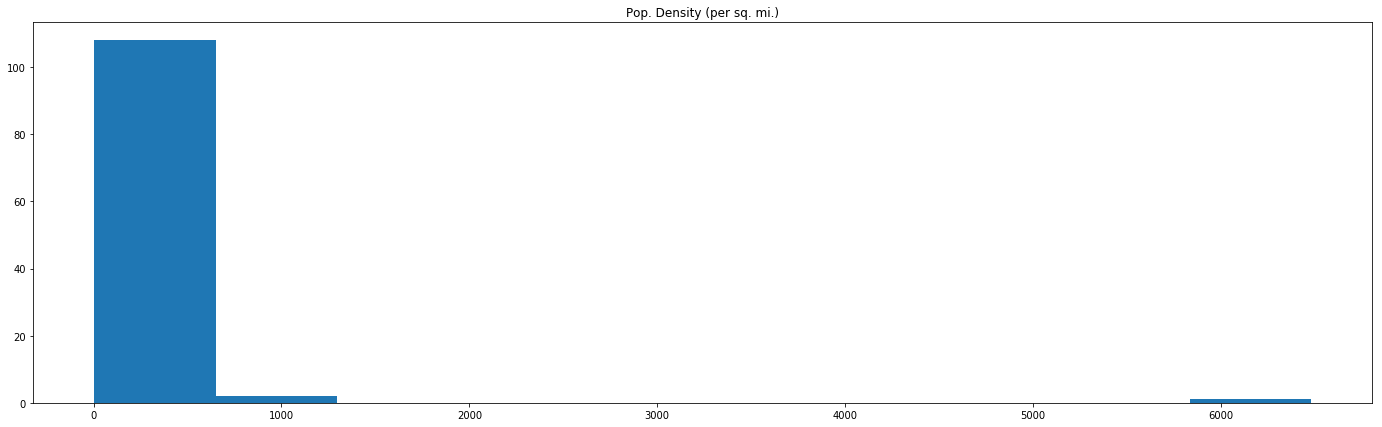

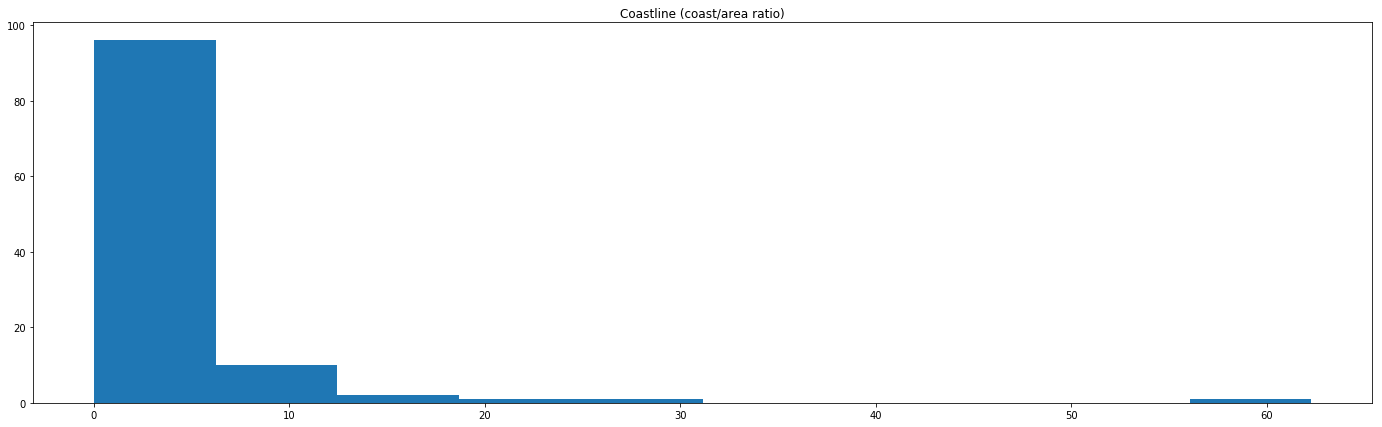

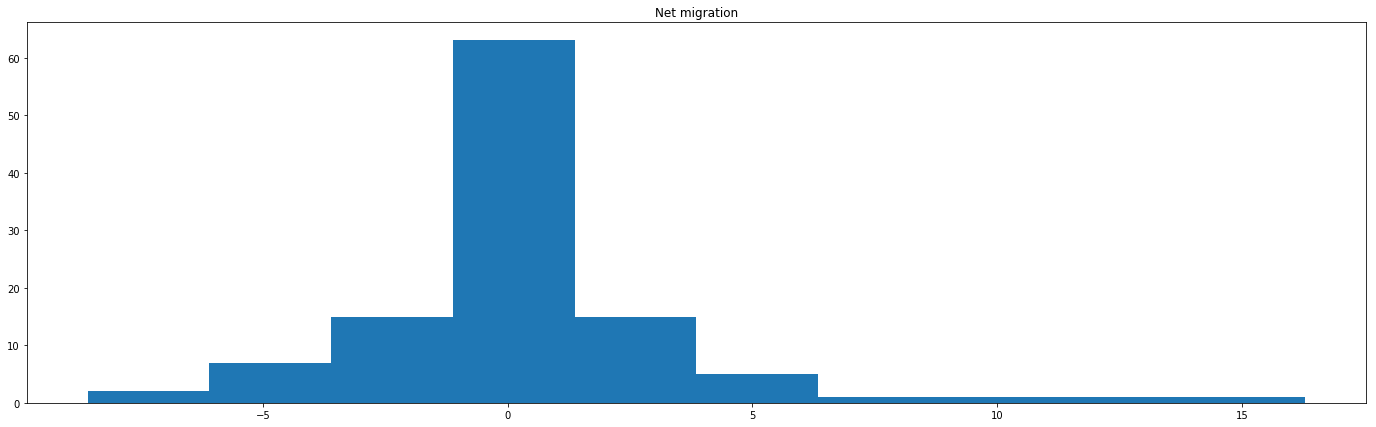

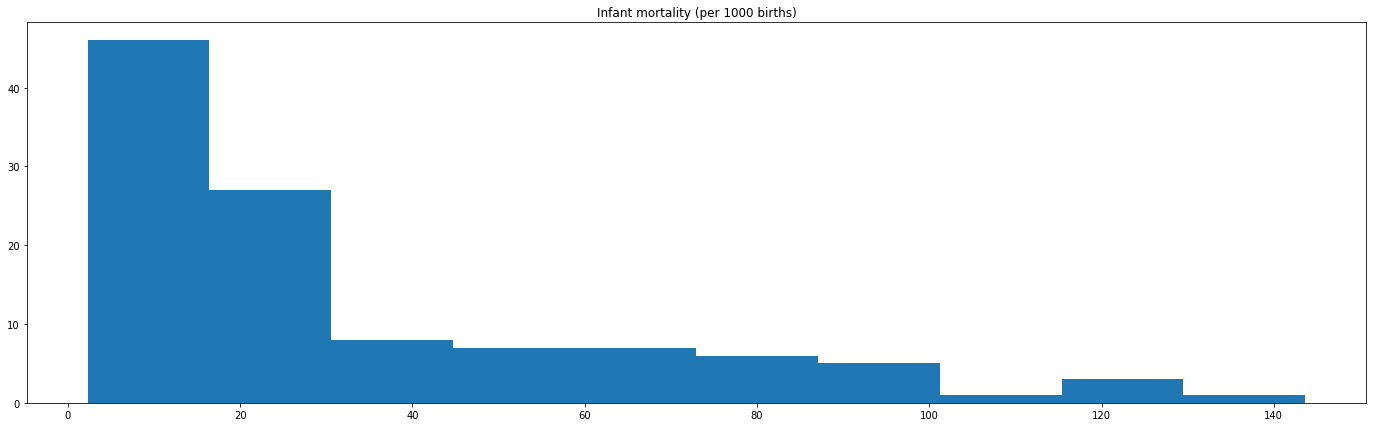

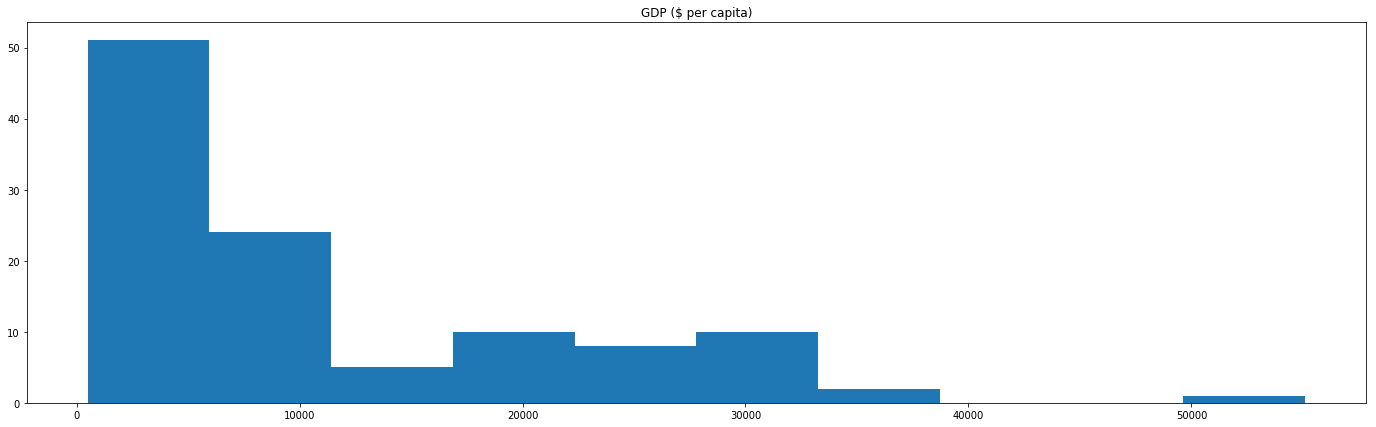

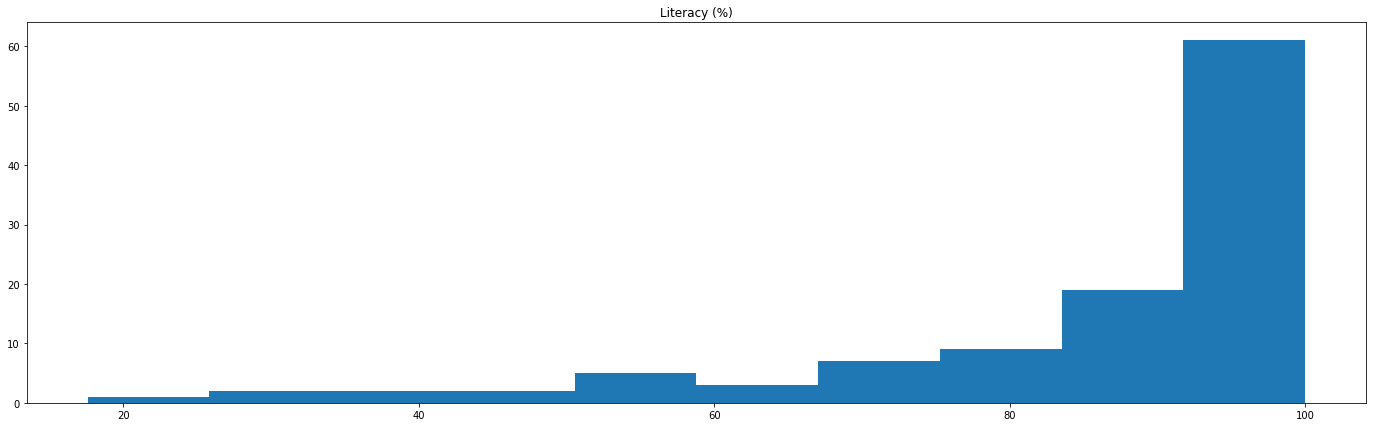

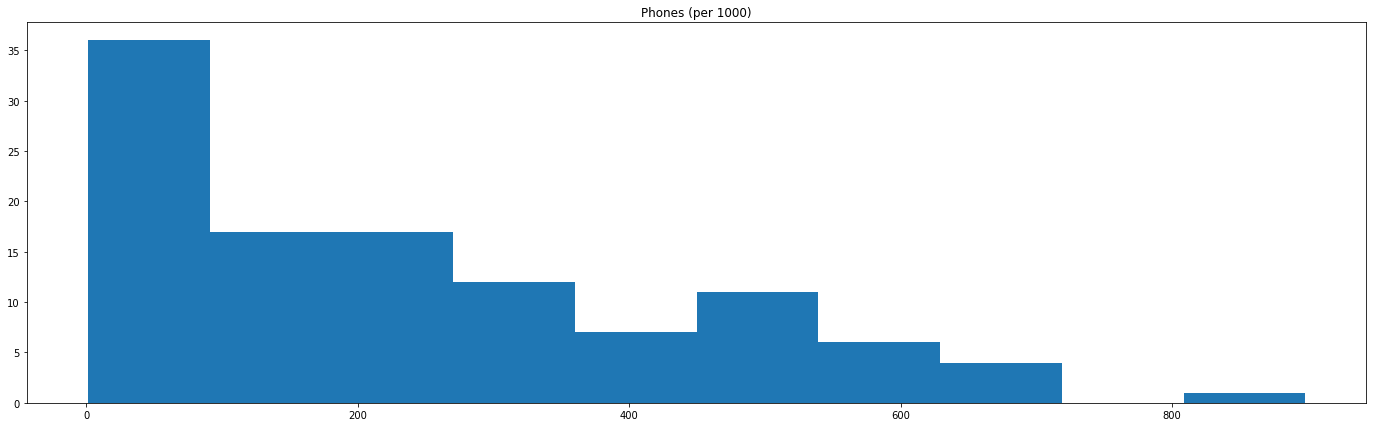

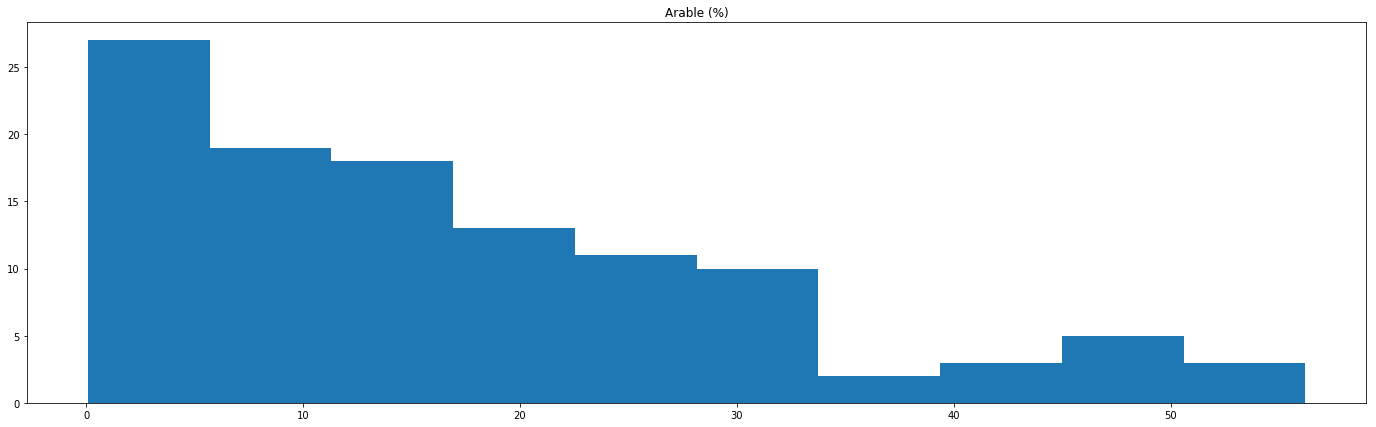

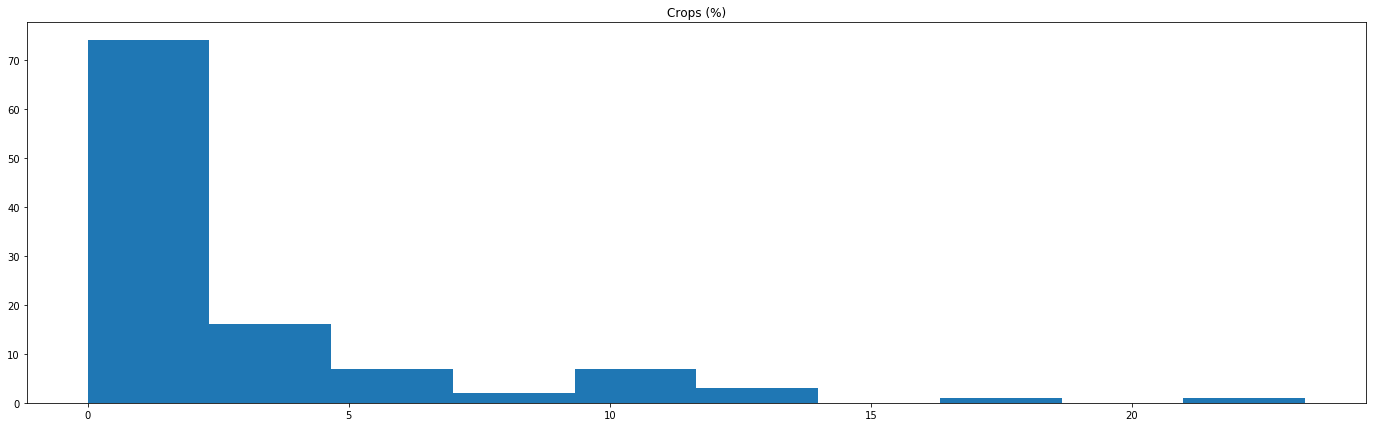

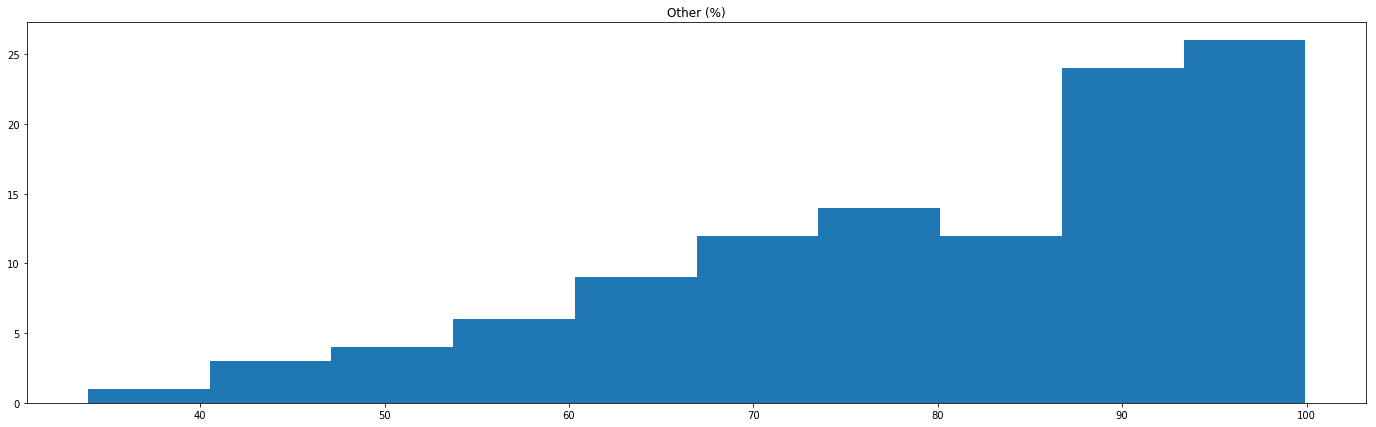

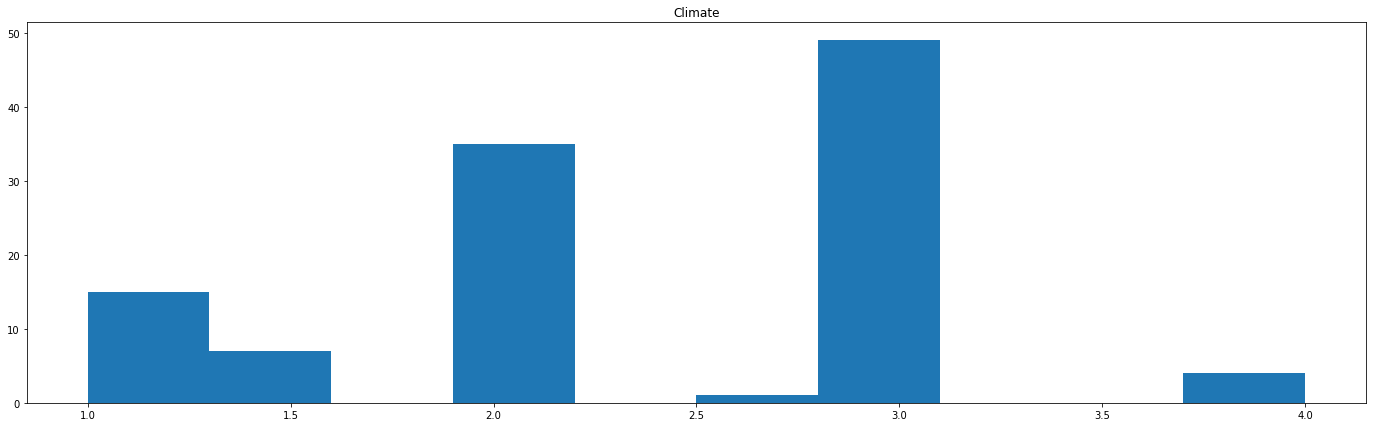

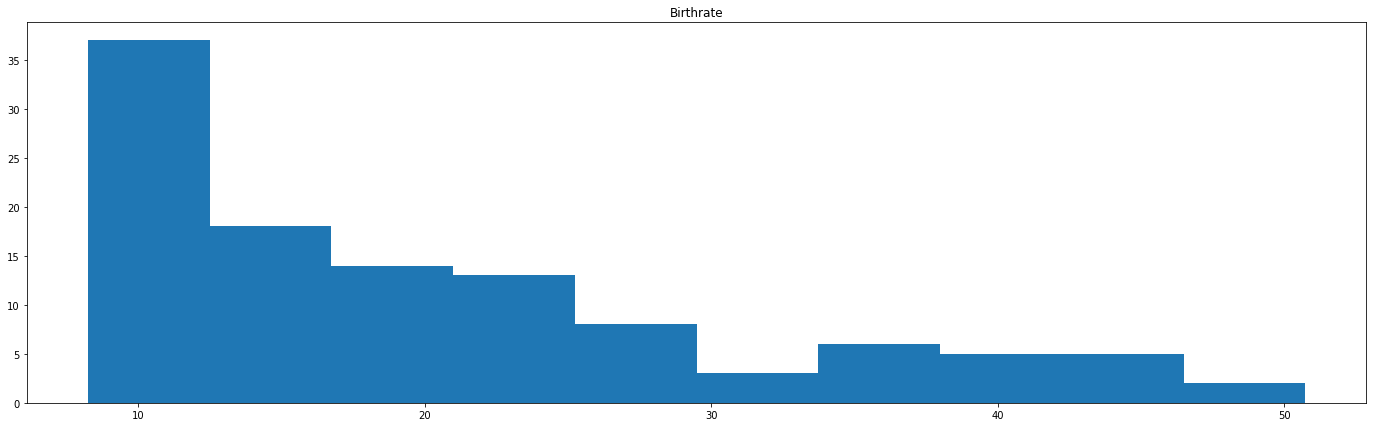

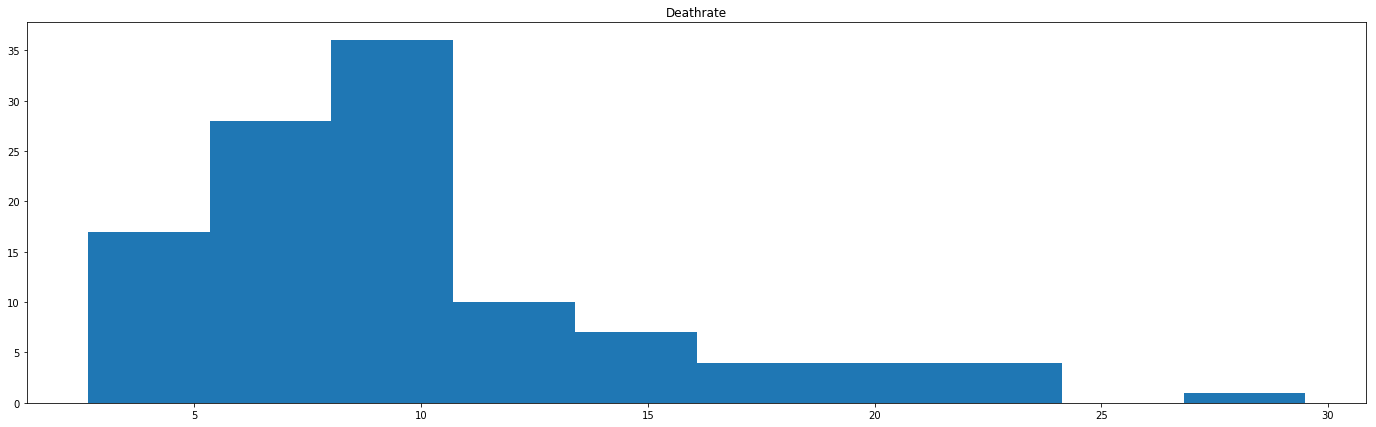

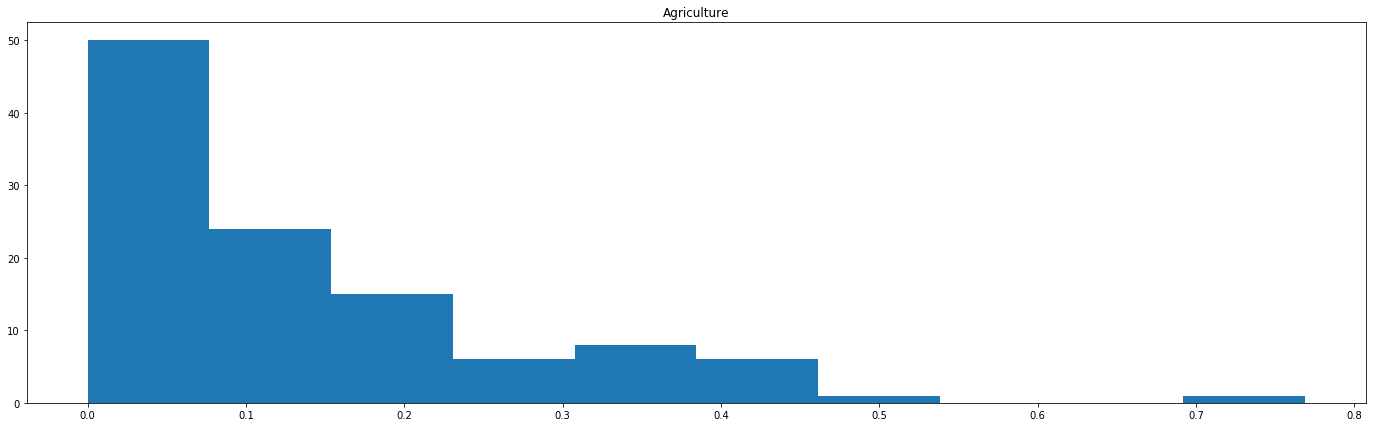

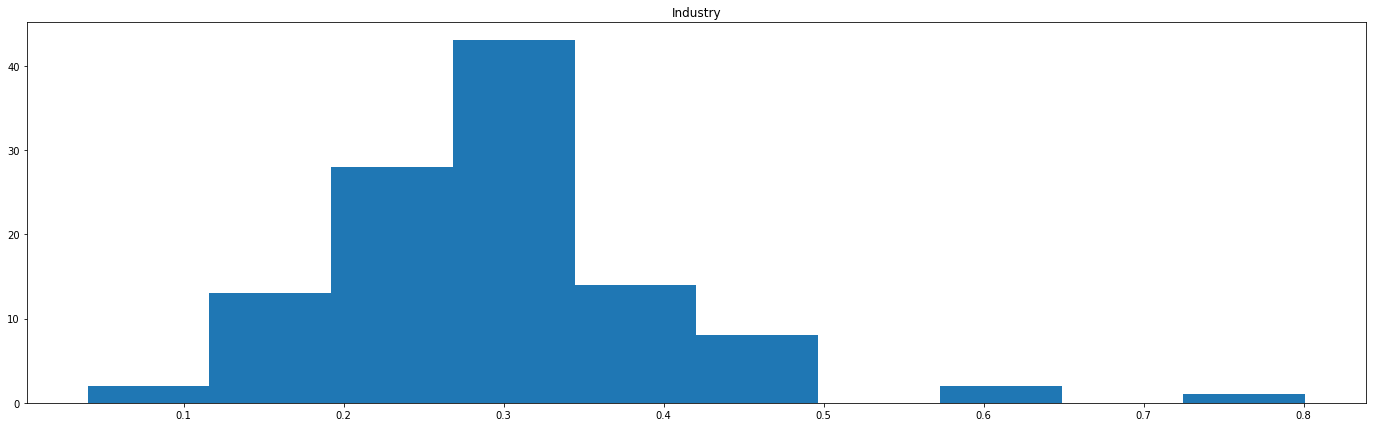

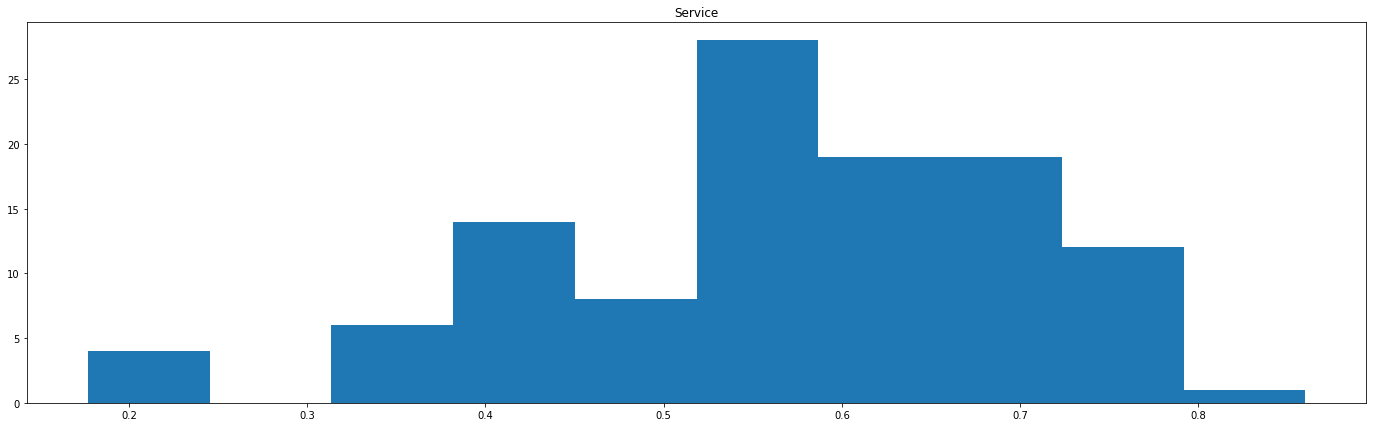

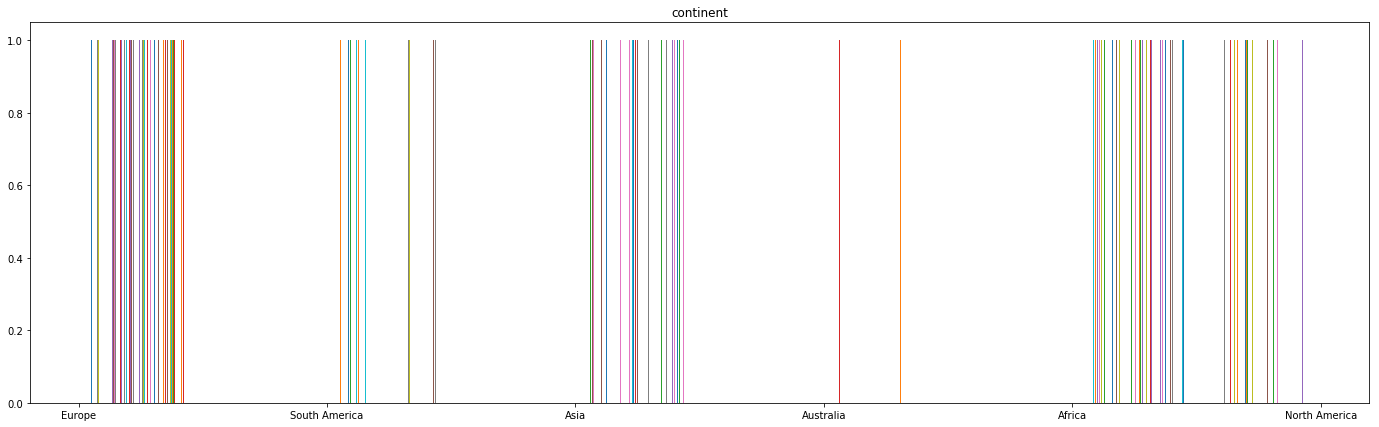

In [91]:
#Histogram for each variable
c=list(df_merged.columns)

for each in c:
    plt.figure(figsize=(24,7))
    plt.title(each)
    plt.hist(df_merged[each])
    plt.show()

In [ ]:
# need to add happiness score by years